## Classification with Sklearn

## loading a dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
category_col = 'author_flair_text_str'
polcompass_df = pd.read_parquet('./data/dataset_whole/polcompass_df.parquet').sort_values(by=['author','created_utc','subreddit'])

In [3]:
from author_flair_mapping import map_mother_categories
df = pd.read_parquet('./data/results_gemini.parquet')
category_col = 'polcompass_flair'

political_only = True

df.Populism = df.Populism.astype(float)
df.AntiElitism = df.AntiElitism.astype(float)
df.PeopleCentrism = df.PeopleCentrism.astype(float)
df.EmotionalAppeal = df.EmotionalAppeal.astype(float)
df.Libertarian = df.Libertarian.astype(float)
df.Authoritarian = df.Authoritarian.astype(float)
df.Left = df.Left.astype(float)
df.Right = df.Right.astype(float)

mapping_gemini = {'Right': 'right', 'Left': 'left', 'Centrist':'centrist', 'Libertarian':'lib', 'Authoritarian':'auth', 'Centrist':'centrist', 'None':None, 'Political':True, 'NonPolitical':False}
def mapping_gemini_cat(curr_cat):
    """dimension = author_flair_mapping.__map_to_valid_dimension__(dimension)
    if dimension is None:
        raise ValueError('Dimension is not correct')
    curr_mapping = h_mapping_gemini if dimension==author_flair_mapping.HORIZONTAL_DIMENSION else v_mapping_gemini if dimension==author_flair_mapping.VERTICAL_DIMENSION else {}
    """
    return mapping_gemini.get(curr_cat, curr_cat)
    
    
df['Political'] = df.Political.map(mapping_gemini_cat)#.fillna(df['HorizontalDimension'])
df['HorizontalDimension'] = df.HorizontalDimension.map(mapping_gemini_cat)#.fillna(df['HorizontalDimension'])
df['VerticalDimension'] = df.VerticalDimension.map(mapping_gemini_cat)

df = map_mother_categories(df.copy(), category_col).reindex(['text','author', 'polcompass_flair', 
        'horizontal_polcompass_flair', 'vertical_polcompass_flair', 'Political', 'HorizontalDimension',
       'VerticalDimension', 'Populism', 'PeopleCentrism', 'AntiElitism',
       'EmotionalAppeal', 'Libertarian', 'Authoritarian', 'Left', 'Right',
       'Motivazioni', 'full_response', ], axis=1).sort_index().sort_values(by='author')


none_dataset_h = df[(df.HorizontalDimension.fillna('None').isin([None, 'none', 'None'])) & (df[['Left', 'Right']].max(axis=1)<=0.2) ]
#none_dataset_h.loc[none_dataset_h.index, [category_col, 'HorizontalDimension', 'horizontal_'+category_col ]] = 'Undefined'
none_dataset_v = df[(df.VerticalDimension.fillna('None').isin([None, 'none', 'None'])) & (df[['Libertarian', 'Authoritarian']].max(axis=1)<=0.2) ]
#none_dataset_v.loc[none_dataset_v.index, [category_col, 'VerticalDimension', 'vertical_'+category_col, ]] = 'Undefined'
none_dataset = pd.concat([none_dataset_h, none_dataset_v],axis=0, ignore_index=False)
none_dataset.loc[none_dataset_h.index, [category_col, 'HorizontalDimension', 'horizontal_'+category_col ]] = 'Undefined'
none_dataset.loc[none_dataset_v.index, [category_col, 'VerticalDimension', 'vertical_'+category_col, ]] = 'Undefined'
none_dataset.loc[none_dataset_h.index.join(none_dataset_v.index , how='inner'), [category_col, 'HorizontalDimension', 'horizontal_'+category_col,  'VerticalDimension', 'vertical_'+category_col,]] = 'Undefined'
none_dataset.drop_duplicates(inplace=True)
del(none_dataset_h, none_dataset_v)
"""
none_dataset = df[(df.HorizontalDimension.fillna('None').isin([None, 'none', 'None'])) & (df.VerticalDimension.fillna('None').isin([None, 'none', 'None'])) & (df[['Libertarian', 'Authoritarian', 'Left', 'Right']].max(axis=1)<0.2) ]
none_dataset.loc[none_dataset.index, [category_col, 'VerticalDimension', 'HorizontalDimension', 'horizontal_'+category_col, 'vertical_'+category_col, ]] = 'Undefined'
"""

#df.loc[none_dataset.index, :] = none_dataset.copy()
curr_dataset = df[(df.HorizontalDimension==df.horizontal_polcompass_flair) | (df.VerticalDimension==df.vertical_polcompass_flair)]
curr_dataset = pd.concat([curr_dataset, none_dataset], axis=0, ignore_index=False).sort_index()
curr_dataset.loc[none_dataset.index, :] = none_dataset.copy()
curr_dataset.drop_duplicates(inplace=True)
if political_only:
    curr_dataset = curr_dataset[curr_dataset.Political==True]
#del(none_dataset)
if (curr_dataset.index.value_counts()>1).any():
    raise ValueError('Wrong index')
curr_dataset

,,text,author,polcompass_flair,horizontal_polcompass_flair,vertical_polcompass_flair,Political,HorizontalDimension,VerticalDimension,Populism,PeopleCentrism,AntiElitism,EmotionalAppeal,Libertarian,Authoritarian,Left,Right,Motivazioni,full_response
content_id,content_type,,,,,,,,,,,,,,,,,,
197648.0,post,How Solar Power Caused the Ukraine War,2455,Undefined,Undefined,Undefined,True,Undefined,Undefined,0.05,0.1,0.1,0.4,0.0,0.0,0.0,0.00,Il titolo è provocatorio e suggerisce un colle...,"Ok, ecco l'analisi del testo fornito, nel form..."
197749.0,post,Glenn Greenwald - The DOJ completely failed to...,2455,libleft,left,lib,True,left,lib,0.60,0.7,0.8,0.7,0.7,0.2,0.7,0.10,"The text criticizes the DOJ and FBI, highlight...",score__Political__score:value__Political__valu...
565947.0,post,How texaco helped franco win the spanish civil...,6431,authleft,left,auth,True,left,None,0.30,0.4,0.5,0.6,0.1,0.6,0.5,0.05,"Il testo è chiaramente politico, riferendosi a...","Ok, ecco l'output basato sul testo fornito e l..."
648512.0,post,Viva la révolution!,7273,libleft,left,lib,True,left,lib,0.60,0.7,0.7,0.8,0.6,0.1,0.6,0.10,"The phrase ""Viva la révolution!"" is inherently...","Ok, ecco l'analisi del testo fornito, nel form..."
696748.0,post,Concern about JPs embrace of a neocon like Dan...,7677,libright,right,lib,True,right,lib,0.60,0.5,0.7,0.6,0.6,0.3,0.2,0.70,The text expresses concern about Jordan Peters...,"```json\n{\n ""score__Political__score"": ""va..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48848923.0,comment,How is she in a cult. Because she doesn’t agre...,35162,centrist,centrist,centrist,True,right,centrist,0.60,0.5,0.7,0.7,0.2,0.1,0.1,0.60,"Il testo esprime un forte dissenso verso la ""a...","Ok, ecco l'analisi del testo fornito:\n\nscore..."
49115586.0,comment,"Oh boy,\n\n&amp;#x200B;\n\n&gt;male-woman==mar...",35380,authright,right,auth,True,right,lib,0.10,0.3,0.2,0.4,0.6,0.2,0.2,0.40,The text defends a judicial nominee against cl...,"```json\n{\n ""score__Political__score"": ""valu..."
49587578.0,comment,I'm from Europe so nobody I know has reasons t...,35763,libcenter,centrist,lib,True,centrist,centrist,0.30,0.4,0.5,0.3,0.3,0.2,0.3,0.30,"The text discusses Trump being ""outside of the...",score__Political__score:value__Political__valu...


In [4]:
from utils import pandas_io_handler
from myText import *
from text_replacement import replace_features_in_text
from nltk.corpus import stopwords
import random
import pandas as pd 

eng_stopwords = stopwords.words('english')
author_sample_frac = 1 ## percentage of authors to load from each chunk
min_author_n_of_texts = 1
content_types = ['post','comment']
comment_ids = curr_dataset[curr_dataset.index.get_level_values('content_type')=='comment'].index.get_level_values('content_id')
post_ids = curr_dataset[curr_dataset.index.get_level_values('content_type')=='post'].index.get_level_values('content_id')
final_df = pd.DataFrame()
for i in range(50):
    try:
        if sorted(final_df.index)==sorted(curr_dataset.index):
            break
        common_starting_file = './data/dataset_whole/mapped_dataframes/{}_chunk_{}_{}.parquet'.format('{}', i, '{}')
        print(i)
        ##ORIGINAL DF (author, author_flair, subreddit, date...)
        curr_final_df = pd.concat([
            pd.read_parquet(common_starting_file.format(content+'s', 'orig_new'), columns=['author', 'date', 'created_utc', 'subreddit'], 
                            filters=[('{}_id'.format(content), 'in', eval('{}_ids'.format(content))),
                                    ]).reset_index()  
                    for content in content_types], axis=0, ignore_index=True)
        if curr_final_df.empty:
            continue
        if (author_sample_frac < 1) or (min_author_n_of_texts > 1):
            n_of_authors_to_load = int(round (curr_final_df.author.nunique() * min([1, author_sample_frac]), 0))
            curr_final_df = curr_final_df.groupby("author").filter(lambda x: x['post_id'].count() > min_author_n_of_texts)
            sampled_authors = pd.Series(curr_final_df.author.unique()).sample(min(curr_final_df.author.nunique(), n_of_authors_to_load)).values
            curr_final_df = curr_final_df[curr_final_df.author.isin(sampled_authors)]
            del(sampled_authors)
        print('Loaded orig...')
        curr_final_df['content_id'] = curr_final_df['post_id'].fillna(curr_final_df['comment_id'])
        curr_final_df['content_type'] = np.nan
        curr_final_df['content_type'] = curr_final_df['content_type'].fillna(curr_final_df.loc[curr_final_df.post_id.notna(), 'post_id'].map(lambda t: 'post')).fillna('comment')
        
        textual_df = pd.concat([pd.read_parquet(common_starting_file.format(content+'s', 'textualfiltered_new'), 
                                                filters=[('{}_id'.format(content), 'in', curr_final_df['{}_id'.format(content)].values)]).reset_index() 
                                for content in content_types], axis=0, ignore_index=True)    
        textual_df['content_id'] = textual_df['post_id'].fillna(textual_df['comment_id'])
        textual_df['content_type'] = np.nan
        textual_df['content_type'] = textual_df['content_type'].fillna(textual_df.loc[textual_df.post_id.notna(), 'post_id'].map(lambda t: 'post')).fillna('comment')
        textual_df.drop(columns=['post_id', 'comment_id'], inplace=True)
        print('Loaded textual...')
        
        curr_final_df = curr_final_df.drop(columns=['post_id', 'comment_id'], errors='ignore').merge(textual_df, how='inner', on=['content_id', 'content_type'])
        
        ## FILTERING TOKENS (REMOVING URLs, EMOJIS, EMOTICONS, MENTIONS, PUNCTUATION, ALL NON-ALPHA CHARS) 
        ## FILTERING FOR EACH FILE IN ORDER TO SAVE MEMORY (AVOIDING CONCATENATING WHOLE TEXTUAL DF BUT ONLY KEEPING VALID TOKENS)
        filtered_tokens = curr_final_df.apply(lambda t: MyText(t, text_col='text'),axis=1).apply(lambda t: replace_features_in_text(t, text_col='tokens', columns_to_replace=[], columns_to_remove=['urls','emoticons','emojis','mentions','repeatedPunctuation'])).map(lambda tokens: [t for token in tokens if (t:=token.lower()) not in eng_stopwords and t.islower()])
        print('Removed stopwords and non alpha tokens')
        curr_final_df['filtered_tokens'] = filtered_tokens
        final_df = pd.concat([final_df, curr_final_df.set_index(['content_id', 'content_type']).drop(columns=textual_df.columns, errors='ignore')], axis=0, ignore_index=False)
        del(curr_final_df, textual_df, filtered_tokens)
    except FileNotFoundError as e:
        print(e)
        continue
    
final_df = final_df.join(curr_dataset.loc[:, ['polcompass_flair','horizontal_polcompass_flair','vertical_polcompass_flair','Political','HorizontalDimension','VerticalDimension','Populism','PeopleCentrism','AntiElitism','EmotionalAppeal']], how='inner')
final_df

0
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
1
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
2
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
3
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
4
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
5
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
6
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
7
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
8
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
9
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
10
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
11
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
12
Loaded orig...
Loaded textual...
Removed stopwords and non alpha tokens
13
Loaded orig...
Loaded textual...

,,author,date,created_utc,subreddit,filtered_tokens,polcompass_flair,horizontal_polcompass_flair,vertical_polcompass_flair,Political,HorizontalDimension,VerticalDimension,Populism,PeopleCentrism,AntiElitism,EmotionalAppeal
content_id,content_type,,,,,,,,,,,,,,,
799133.0,comment,595,2020-07-09,2020-07-09 02:48:30,news,"[jeez, people, complain, capitalism, free, mar...",libright,right,lib,True,right,lib,0.3,0.4,0.5,0.3
792191.0,comment,595,2020-08-03,2020-08-03 01:56:39,GoldandBlack,"[student, pretty, crazy, though, denied, uyghu...",Undefined,Undefined,Undefined,True,Undefined,Undefined,0.1,0.1,0.1,0.3
794631.0,comment,595,2020-08-05,2020-08-05 23:16:13,CapitalismVSocialism,"[state, regulation, actually, destroy, competi...",libright,right,lib,True,centrist,lib,0.1,0.2,0.4,0.2
888767.0,comment,671,2022-10-03,2022-10-03 02:45:43,TheLeftCantMeme,"[page, trump, businessman, v]",centrist,centrist,centrist,True,right,centrist,0.1,0.1,0.1,0.2
1957812.0,comment,1397,2021-08-04,2021-08-04 16:06:57,AskLibertarians,"[however, mentally, physically, prepared, pare...",Undefined,Undefined,lib,True,Undefined,None,0.1,0.1,0.1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48352281.0,comment,34768,2021-04-05,2021-04-05 03:00:04,monarchism,"[unaware, term, used, describe, followers, hoppe]",libright,right,lib,True,right,lib,0.1,0.2,0.3,0.1
49115586.0,comment,35380,2020-09-24,2020-09-24 22:59:45,Libertarian,"[oh, boy, #x200b, male-woman, marriage, consen...",authright,right,auth,True,right,lib,0.1,0.3,0.2,0.4
49707478.0,comment,35854,2022-04-04,2022-04-04 13:10:31,CapitalismVSocialism,"[argument, could, possibly, provide, someone, ...",libleft,left,lib,True,left,lib,0.6,0.7,0.8,0.7


<Axes: xlabel='vertical_polcompass_flair'>

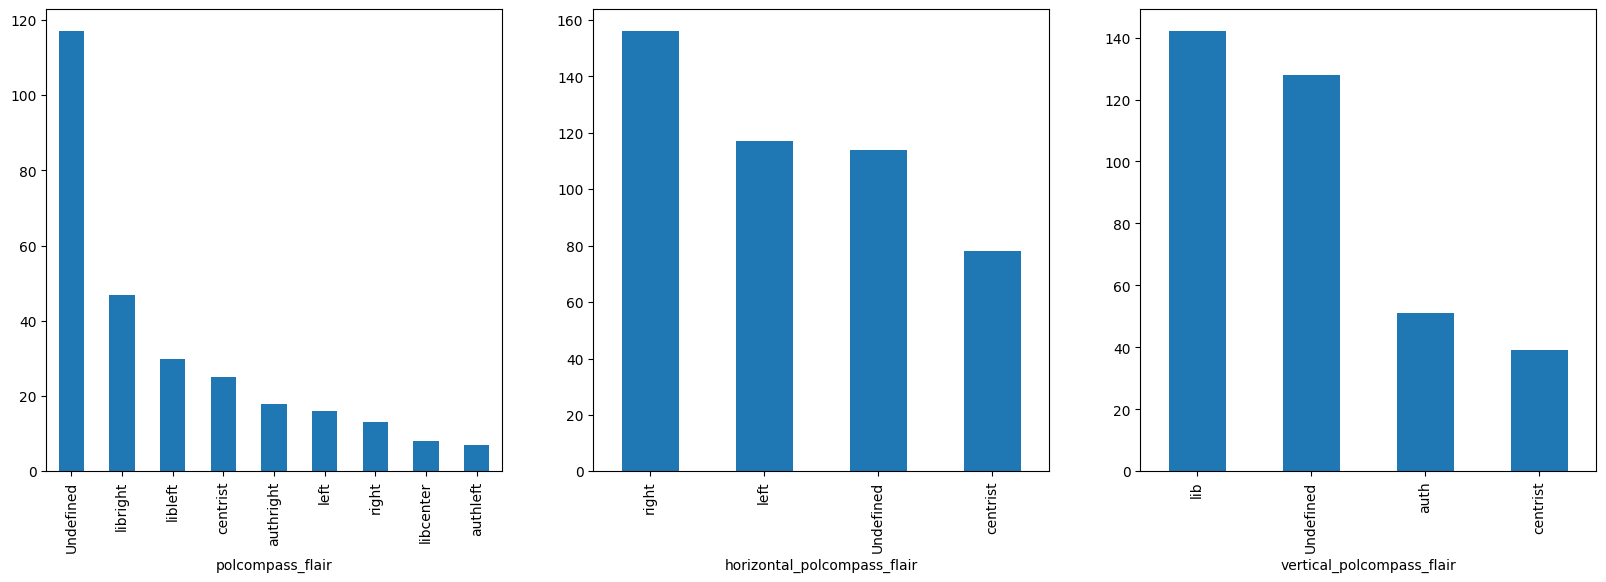

In [5]:
from author_flair_mapping import get_mother_categories
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize=(20,6))

final_df.loc[(final_df['VerticalDimension'].fillna('centrist')==final_df['vertical_polcompass_flair'].fillna('centrist')) & (final_df['HorizontalDimension'].fillna('centrist')==final_df['horizontal_polcompass_flair'].fillna('centrist')), category_col].value_counts(dropna=False).plot(kind='bar', ax=axs[0])

final_df.loc[(final_df.HorizontalDimension==final_df.horizontal_polcompass_flair), 'horizontal_'+category_col].value_counts().plot(kind='bar', ax=axs[1])

final_df.loc[(final_df.VerticalDimension==final_df.vertical_polcompass_flair), 'vertical_'+category_col].value_counts().plot(kind='bar', ax=axs[2])



In [6]:
import author_flair_mapping
import warnings
from imblearn.over_sampling import SMOTE
    
def get_curr_dataset(df: pd.DataFrame, dimension: str, training_col: str = 'filtered_tokens', category_col: str = 'author_flair_text', category_ovo: str = None, undersample: str = None, force_if_already_existing: bool = False, values_only: bool = False, split_x_y: bool = None, dropna: bool = True):
    if split_x_y is None:
        split_x_y = values_only
        
    dimension = author_flair_mapping.__map_to_valid_dimension__(dimension)
    curr_y_col = category_col if dimension is None else dimension+'_'+category_col
         
    if dimension in [author_flair_mapping.VERTICAL_DIMENSION, author_flair_mapping.HORIZONTAL_DIMENSION]:
        df = map_mother_categories(df.copy(), category_col) if ( curr_y_col not in df.columns or force_if_already_existing ) else df.copy()
    
    if isinstance(training_col, (np.ndarray, pd.Series, pd.Index)):
        training_col = list(training_col)
    
    df = df[flatten([training_col])+[curr_y_col]]
    dataset = df[df.notna().all(axis=1)] if dropna else df[df[curr_y_col].notna()]

    if category_ovo:
        valid_flairs = author_flair_mapping.vertical_valid_flairs if dimension==author_flair_mapping.VERTICAL_DIMENSION else author_flair_mapping.horizontal_valid_flairs if dimension==author_flair_mapping.HORIZONTAL_DIMENSION else author_flair_mapping.all_valid_flairs 
        if category_ovo not in valid_flairs:
            warnings.warn('The category "{}" is not a valid category for the current dimension "{}"... Will still map to binary but it is very likely not to have any matches (i.e. all the binary class values will be False)'.format(category_ovo, dimension))
        tmp_s = dataset.loc[:, curr_y_col].copy().map(lambda v: v==category_ovo)
        dataset[curr_y_col+'_is_'+category_ovo] = tmp_s.copy()
        curr_y_col += '_is_'+category_ovo
    if undersample:
        if undersample.lower()=='smote':
            classes_freq = dataset[curr_y_col].value_counts()
            resampled_dct = {k:new_v for (k,v) in classes_freq.tail(-1).to_dict().items() if (new_v:=min(classes_freq.loc[k]*20, round(classes_freq.iloc[0]*1)))>v}
            smote = SMOTE(random_state=42, sampling_strategy=resampled_dct)
            X_resampled, y_resampled = smote.fit_resample(dataset[training_col].values, dataset[curr_y_col].values)
            dataset = pd.concat([pd.DataFrame(X_resampled, columns=training_col), pd.Series(y_resampled, name=curr_y_col)], axis=1, ignore_index=False)
        else:
            if undersample.lower()=='max':
                n_of_samples_by_category = int(round(len(dataset)/dataset[curr_y_col].nunique(), 0))
            else:
                n_of_samples_by_category = dataset[curr_y_col].value_counts().min()
            dataset = dataset.groupby(curr_y_col).apply(\
                                  lambda x:x.sample(min(len(x), n_of_samples_by_category)),include_groups=False)\
                                    .reset_index(level=0).loc[:,dataset.columns]
    if not split_x_y:
        if not isinstance(training_col, (list, np.ndarray, pd.Series, pd.Index)):
            training_col = [training_col]
        return dataset[training_col+[curr_y_col]].values if values_only else dataset[training_col+[curr_y_col]]
    else:
        return (dataset[training_col].values, dataset[curr_y_col].values) if values_only else (dataset[training_col], dataset[curr_y_col])

# Classification

### STEPS:
    1. Estimating best parameters for tf-idf (min df, best k, ngram_range)
    2. Calculating/generating TF-IDF vectors
    3. Eventually grouping at author level
    4. Adding other features
    5. Building Model(s)
        5.1 Estimating best params for the current model through CV and grid_search
    6. Combining models (Horizontal-> Vertical; Vertical -> Horizontal)
        6.1 1vsOthers vs Multiclass Model
    7. Comparing results (1 Model vs H+V vs V+H; 1vsO vs MultiLabel Model)

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC

## SKLEARN PIPELINE -> TFIDF, CHI-SQUARE

### Default pipeline, on text level

In [8]:
from author_flair_mapping import map_mother_categories
from sklearn.preprocessing import LabelEncoder

curr_dimension = None
global_label_encoder = LabelEncoder()
global_label_encoder.fit_transform(final_df[category_col].dropna())
global_label_mapping = {c:global_label_encoder.transform([c])[0] for c in global_label_encoder.classes_}

h_label_encoder = LabelEncoder()
h_label_encoder.fit_transform(final_df['horizontal_'+category_col].dropna())
h_label_mapping = {c:h_label_encoder.transform([c])[0] for c in h_label_encoder.classes_}

v_label_encoder = LabelEncoder()
v_label_encoder.fit_transform(final_df['vertical_'+category_col].dropna())
v_label_mapping = {c:v_label_encoder.transform([c])[0] for c in v_label_encoder.classes_}


inv_global_label_mapping = {v:k for k,v in global_label_mapping.items()}
inv_h_label_mapping = {v:k for k,v in h_label_mapping.items()}
inv_v_label_mapping = {v:k for k,v in v_label_mapping.items()}

In [9]:
text_col = 'filtered_tokens'
curr_category_one_vs_others = None
curr_dimension = None
remove_hashtags_from_token = True

if remove_hashtags_from_token:
    final_df[text_col] = final_df[text_col].map(lambda tokens: [tok if not tok.lower().startswith('#') else tok.replace('#','') for tok in tokens if tok!='#x200b' ])


x_train, y_train =  get_curr_dataset(final_df, dimension=curr_dimension, training_col=text_col, category_col=category_col, split_x_y=True, values_only=False)

#y_train_bin = pd.Series(y_train).str.lower()==curr_category_one_vs_others

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from tfidf_utils import do_nothing


best_preprocess_params_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=do_nothing, preprocessor=do_nothing)),  # frequencies
    ('tfidf', TfidfTransformer()),  # tfidf
    ('kbest', SelectKBest(score_func=chi2)),  # feature/words selection
    ('learner', OneVsRestClassifier(LinearSVC()) )  # learning algorithm
])

y_train_numeric = global_label_encoder.transform(y_train)

param_grid = {
    'vectorizer__min_df': [.00001, .0001, .001], 
    'vectorizer__ngram_range': [(1, 1), (1,2), (1, 3)], 
    'kbest__k': [1000],  # Numero di feature da selezionare
}

# Creare il GridSearchCV con DummyClassifier (senza un vero classificatore)
best_preprocess_grid_search = GridSearchCV(best_preprocess_params_pipeline, param_grid, cv=5, n_jobs=10, verbose=3)
best_preprocess_grid_search.fit(x_train.sample(500),y_train_numeric[:500])
best_preprocess_grid_search.best_params_

In [ ]:
kb = best_preprocess_grid_search.best_estimator_['kbest']#.get_features_names_out()
kb_indexes = list(map(lambda v: int(v.split('x')[1]), kb.get_feature_names_out()))
best_preprocess_grid_search.best_estimator_['vectorizer'].get_feature_names_out()[kb_indexes]

### USING BEST PARAMS TO BUILD A TF-IDF MATRIX
#### SPLITTING TRAINING AND TEST SET AND BUILDING/TESTING MODELS

In [10]:
final_df = final_df[final_df.author.isin(
            final_df[final_df[category_col].notna()].author.unique() )]


test_sample_frac = 0.2

from sklearn.model_selection import train_test_split
from author_flair_mapping import map_mother_categories

split_by_authors = False
if split_by_authors:
    train,test = [curr_dataset.explode(final_df.drop(columns=['date','created_utc','subreddit', ], errors='ignore')).reset_index().set_index(['author']+final_df.index.names) for curr_dataset in train_test_split(final_df.reset_index().groupby('author')[final_df.index.names+[text_col, category_col]].agg(lambda t: list(t)), test_size=test_sample_frac)]#.set_index('author')#[['author','filtered_tokens','author_flair_text']]
else:
    train,test=train_test_split(final_df.reset_index().set_index(['author']+final_df.index.names).drop(columns=['date','created_utc','subreddit',] , errors='ignore'), test_size=test_sample_frac)    

del(final_df)


In [11]:
import author_flair_mapping
curr_category_one_vs_others = None
curr_dimension = None

text_col, curr_y_col  = 'filtered_tokens', 'polcompass_flair'

x_train, y_train, x_test, y_test = train[text_col].values, train[curr_y_col].values, test[text_col].values, test[curr_y_col].values
y_train_bin = pd.Series(y_train).str.lower()==curr_category_one_vs_others

#### CALCULATING TF-IDF AND ESTIMATING BEST PARAMETERS (NGRAMS, BEST K ETC)

In [12]:
from sklearn.model_selection import GridSearchCV

def get_best_params_and_scores_gridsearch(gridsearch: GridSearchCV) -> pd.DataFrame:
    sorted_scores = sorted([(i, v) for i,v in enumerate(gridsearch.cv_results_['mean_test_score'])], key=lambda x: x[1], reverse=True)
    sorted_best_params = [(i, gridsearch.cv_results_['params'][i]) for i in map(lambda x: x[0], sorted_scores)]
    
    return pd.merge(pd.DataFrame.from_records(sorted_scores, columns=['index', 'mean_test_score']).set_index('index'),
           pd.DataFrame.from_records(sorted_best_params, columns=['index', 'parameters']).set_index('index').parameters.apply(pd.Series),
             left_index=True, right_index=True)

In [13]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

grid_search_params_linearsvc = [
    {'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'], 'loss': ['hinge', 'squared_hinge'],
     'penalty': ['l2']},
    {'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'], 'loss': ['squared_hinge'],
     'penalty': ['l1']},

]

grid_search_params_randomforest = [{'criterion': ['gini', 'entropy'], 'n_estimators': [10, 100],
                                   'min_samples_split': [0.001, 0.02], 'class_weight': [None, 'balanced']}
                                  ]

grid_search_params_logregression = [{'penalty': ['l2'], 'solver': ['sag', 'saga'],
                                     'class_weight': [None, 'balanced'], 'C': [0.1, 1, 10],
                                    'max_iter': [5000, 1000]},
                                   {'penalty': [None], 'solver': ['sag', 'saga'],
                                    'class_weight': [None, 'balanced'], 'max_iter': [5000, 1000]}]


estimator_to_params_dict = {LinearSVC(max_iter=3000, dual='auto'): grid_search_params_linearsvc,
                            RandomForestClassifier(): grid_search_params_randomforest,
                           LogisticRegression(tol=1e-3): grid_search_params_logregression}

In [ ]:
from scipy.sparse import csr_matrix

best_score = 1 # 1 for best, 2 for 2nd best, etc
best_index = np.where(best_preprocess_grid_search.cv_results_['rank_test_score']==best_score)[0][0]

tfidf_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=do_nothing, preprocessor=do_nothing, ngram_range=(1,3))),  # frequencies
    ('tfidf', TfidfTransformer()),  # tfidf
    ('kbest', SelectKBest(score_func=chi2, k=20)),
])
tfidf_pipeline.set_params(**best_preprocess_grid_search.cv_results_['params'][best_index])
#tfidf_pipeline.set_params(**{'kbest__k':100})
xtrain_tfidf = tfidf_pipeline.fit_transform(x_train, y_train)
train['tfidf'] = np.array(csr_matrix(xtrain_tfidf)) #list(xtrain_tfidf.toarray())

xtest_tfidf = tfidf_pipeline.transform(x_test)
test['tfidf'] = np.array(csr_matrix(xtest_tfidf)) #list(xtrain_tfidf.toarray())

del(xtrain_tfidf, xtest_tfidf, x_train, y_train, x_test, y_test)
train

#### BUILDING MODELS ON TF-IDF FEATURES ONLY

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.model_selection import ParameterGrid
from scipy.sparse import csr_matrix
from scipy.sparse import hstack as scipy_hstack
from scipy.sparse import vstack as scipy_vstack
import time
curr_train_col = 'tfidf'
curr_dimension = None
curr_train = get_curr_dataset(train, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col).sample(frac=0.1)
curr_train_col, curr_y_col = curr_train.columns

y_encoded = global_label_encoder.transform(curr_train[curr_y_col])  # Codifica il target (le etichette)
estimators = {}
for estimator, grid_search_params in estimator_to_params_dict.items():
    print(estimator)
    time.sleep(3)
    whole_clf_gridsearch = GridSearchCV(estimator, n_jobs=6, cv=3, param_grid=grid_search_params, verbose=3)
    whole_clf_gridsearch.fit(scipy_vstack(curr_train[curr_train_col].values), y_encoded)    
    predictions = whole_clf_gridsearch.predict(scipy_vstack(test[curr_train_col]))
    print('Classification report:')
    print(classification_report(global_label_encoder.transform(test[curr_y_col]), predictions))
    print('Confusion matrix:')
    cm = confusion_matrix(global_label_encoder.transform(test[curr_y_col]), predictions)
    print(cm)
    
    estimators[str(estimator).split('()')[0]] = get_best_params_and_scores_gridsearch(whole_clf_gridsearch)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

curr_dimension = 'h'
curr_train = get_curr_dataset(train, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col).sample(frac=0.2)
curr_test = get_curr_dataset(test, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col)
curr_train_col, curr_y_col = curr_train.columns

y_encoded = h_label_encoder.transform(curr_train[curr_y_col])  # Codifica il target (le etichette)
h_estimators = {}
for estimator, grid_search_params in estimator_to_params_dict.items():
    print(estimator)
    time.sleep(3)
    horizontal_clf_gridsearch = GridSearchCV(estimator, n_jobs=6, cv=3, param_grid=grid_search_params, verbose=3)
    horizontal_clf_gridsearch.fit(scipy_vstack(curr_train[curr_train_col].values), y_encoded)    
    predictions = horizontal_clf_gridsearch.predict(scipy_vstack(curr_test[curr_train_col]))
    print('Classification report (dimension {}, classifier {}):'.format(curr_dimension, estimator))
    print(classification_report(h_label_encoder.transform(curr_test[curr_y_col]), predictions))
    print('Confusion matrix:')
    cm = confusion_matrix(h_label_encoder.transform(curr_test[curr_y_col]), predictions)
    print(cm)
    
    h_estimators[str(estimator).split('()')[0]] = get_best_params_and_scores_gridsearch(horizontal_clf_gridsearch)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

curr_dimension = 'v'
curr_train = get_curr_dataset(train, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col).sample(frac=0.2)
curr_test = get_curr_dataset(test, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col)
curr_train_col, curr_y_col = curr_train.columns

y_encoded = v_label_encoder.transform(curr_train[curr_y_col])  # Codifica il target (le etichette)
v_estimators = {}
for estimator, grid_search_params in estimator_to_params_dict.items():
    print(estimator)
    time.sleep(3)
    vertical_clf_gridsearch = GridSearchCV(estimator, n_jobs=6, cv=3, param_grid=grid_search_params, verbose=3)
    vertical_clf_gridsearch.fit(scipy_vstack(curr_train[curr_train_col].values), y_encoded)
    predictions = vertical_clf_gridsearch.predict(scipy_vstack(curr_test[curr_train_col]))
    print('Classification report (dimension {}, classifier {}):'.format(curr_dimension, estimator))
    print(classification_report(v_label_encoder.transform(curr_test[curr_y_col]), predictions))
    print('Confusion matrix:')
    cm = confusion_matrix(v_label_encoder.transform(curr_test[curr_y_col]), predictions)
    print(cm)
    
    v_estimators[str(estimator).split('()')[0]] = get_best_params_and_scores_gridsearch(vertical_clf_gridsearch)

In [ ]:
### BUILDING MODEL WITH 'BALANCED' PARAMETER FOR CLASS WEIGHT

curr_dimension = 'v'
curr_train = get_curr_dataset(train, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col).sample(frac=0.2)
curr_test = get_curr_dataset(test, dimension=curr_dimension, training_col=curr_train_col, category_col=category_col)
curr_train_col, curr_y_col = curr_train.columns

y_encoded = v_label_encoder.transform(curr_train[curr_y_col])  # Codifica il target (le etichette)


v_rf = RandomForestClassifier(min_samples_split=.01, n_estimators=10, class_weight='balanced')
v_rf.fit(scipy_vstack(curr_train[curr_train_col].values), y_encoded)
#curr_train

predictions = v_rf.predict(scipy_vstack(curr_test[curr_train_col]))
print('Classification report (dimension {}, classifier {}):'.format(curr_dimension, estimator))
print(classification_report(v_label_encoder.transform(curr_test[curr_y_col]), predictions))
print('Confusion matrix:')
cm = confusion_matrix(v_label_encoder.transform(curr_test[curr_y_col]), predictions)
print(cm)

In [ ]:
best_score = 37 # 1 for best, 2 for 2nd best, etc
best_index = np.where(vertical_clf_gridsearch.cv_results_['rank_test_score']==best_score)[0][0]
vertical_clf_gridsearch.cv_results_['params'][best_index]
#vertical_clf_gridsearch.cv_results_['mean_test_score'][best_index]

### ADDING CONTEXTUAL FEATURES (sentiment, VAD, emotional features etc)

In [ ]:

"""
textual_df.apply(lambda row: filter_list(list_to_filter=list(map(lambda x: x[0],row['pos_tag'])),
                                        list_to_look=row['filtered_tokens'],
                                        return_indexes=True), axis=1)
"""

In [14]:
load_from_disk = False
#curr_saving_directory = '../Tesi/code/data/models/8/'
if load_from_disk:
    train = pd.read_parquet(curr_saving_directory+'train.parquet')
    test = pd.read_parquet(curr_saving_directory+'test.parquet')

In [15]:
from utils import pandas_io_handler
from text_utils import get_wordnet_pos
from textual_features_extraction import get_emoji_sentiment, get_emoticon_sentiment
from utils import filter_list
from nltk.corpus import wordnet
"""
TODO -> 
    2. FILLNA VS NON FILLNA FOR MEAN IN VAD AND SOCIALNESS (SO FAR MEAN=mean(SCORES_MATCHES) , if fillna MEAN=mean(all_tokens_scores) -> i.e. token_score=0 (default_value) if no match) 
"""
curr_content_ind = np.where([x=='content_type' for x in train.index.names])[0][0]
whole_index_len = len(train.index.names)
content_locator_str = '[' + ':, ' * (curr_content_ind) + '"{}",' + ':, ' * (whole_index_len-curr_content_ind-1) + ']'
unique_authors_str = "set(train.index.get_level_values('author')) | set(test.index.get_level_values('author'))"
unique_posts_str = "set(train.loc"+content_locator_str.format("post")+".index.get_level_values('content_id')) | set(test.loc"+content_locator_str.format("post")+".index.get_level_values('content_id'))"
unique_comments_str = "set(train.loc"+content_locator_str.format("comment")+".index.get_level_values('content_id')) | set(test.loc"+content_locator_str.format("comment")+".index.get_level_values('content_id'))"


groupby_author=False
content_types = ['posts','comments']
features_df = pd.DataFrame()
tmp = pd.concat([train[['filtered_tokens']],test[['filtered_tokens']]],axis=0,ignore_index=False).reset_index().set_index(['content_type','content_id'])[['filtered_tokens']]
for i in range(50):
    common_starting_file = './data/dataset_whole/mapped_dataframes/{}_chunk_{}_{}.parquet'.format('{}', i, '{}')
    content_final_df = pd.DataFrame()
    for content in content_types:
        starting_file = common_starting_file.format(content, '{}')
        print(starting_file)
        
        ##TEXTUAL DF (emojis, emoticons, urls, tokens, sentences...)
        textual_df = pd.read_parquet(starting_file.format('textualfiltered_new'), filters=[('{}_id'.format(content[:-1]), 'in', eval(eval("unique_{}_str".format(content))) )])
        
        if not len(textual_df):
            warnings.warn('No data loaded, probably none of them is in the current training/test set...')
            continue
        
        ##ORIGINAL DF (author, author_flair, subreddit, date...)
        orig_df = pd.read_parquet(starting_file.format('orig_new'), columns=['author'], filters=[('{}_id'.format(content[:-1]), 'in', textual_df.index)])
        #orig_df.sort_values(by=['author','created_utc','subreddit'], inplace=True)
        #orig_df['author_flair_text'] = orig_df['author_flair_text'].map(lambda value: value if value>=0 else np.nan)
        orig_df['content_type'] = content[:-1]

        ###SPLITTING POLCOMPASS AND NON_POLCOMPASS 
        others_df = orig_df 
        #curr_polcompass_df = orig_df[orig_df.subreddit.str.lower().isin(['politicalcompass','politicalcompassmemes', 'politicalcompassmemes2'])]
        #others_df = orig_df[~orig_df.index.isin(curr_polcompass_df.index)]
        ###filling author_flair_text on the non_polcompass 
        #last_flairs_by_author = get_author_flair(polcompass_df.sort_values(by=['created_utc']).groupby('author'))#.apply(get_author_flair)
        #others_df['author_flair_text'] = others_df[['author']].merge(last_flairs_by_author, left_on='author', right_index=True).author_flair_text

        ###mapping textual_df to counts -> counting urls, upperWords, mentions, hashtags, badwords, emoticons, emojis, positive/negative emoticons|emojis, tokens, sentences
        emojis_counts = pd.json_normalize(textual_df.emojis\
                                            .map(lambda emos: [get_emoji_sentiment(e['feature_value']) for e in emos])\
                                            .map(lambda sentiments: {sent: sentiments.count(sent) for sent in [-1,1,0]}))\
                            .rename({
                                1:'positive_emojis_count', 
                                -1:'negative_emojis_count',
                                0: 'neutral_emojis_count'},axis=1).set_index(textual_df.index)
        emojis_counts['emojis_count'] = emojis_counts['positive_emojis_count']+emojis_counts['negative_emojis_count']+emojis_counts['neutral_emojis_count']

        emoticons_counts = pd.json_normalize(textual_df.emoticons\
                                            .map(lambda emos: [get_emoticon_sentiment(e['feature_value']) for e in emos])\
                                            .map(lambda sentiments: {sent: sentiments.count(sent) for sent in [-1,1,0]}))\
                            .rename({
                                1:'positive_emoticons_count', 
                                -1:'negative_emoticons_count',
                                0: 'neutral_emoticons_count'},axis=1).set_index(textual_df.index)
        emoticons_counts['emoticons_count'] = emoticons_counts['negative_emoticons_count']+emoticons_counts['positive_emoticons_count']+emoticons_counts['neutral_emoticons_count']
        curr_textual_ind, curr_textual_cols = textual_df.index.name, textual_df.columns
        textual_df['content_type'] = content[:-1]
        textual_df = textual_df.reset_index().rename({'{}_id'.format(content[:-1]):'content_id'},axis=1).set_index(['content_type', 'content_id']).join(tmp['filtered_tokens'], on=['content_type', 'content_id'], how='inner')
        textual_df['pos_tag'] = textual_df.apply(lambda row: [row['pos_tag'][ind] 
                              for ind in filter_list(list_to_filter=list(map(lambda x: x[0].lower() if not x[0].startswith('#') else x[0].replace('#','').lower(), row['pos_tag'])),
                                        list_to_look=row['filtered_tokens'],
                                        return_indexes=True)], axis=1)
        #print(textual_df[textual_df.pos_tag.map(len)!=textual_df.filtered_tokens.map(len)].empty)
        textual_df = textual_df.reset_index().rename({'content_id':'{}_id'.format(content[:-1])},axis=1)[list(curr_textual_cols)+flatten([curr_textual_ind])].set_index(curr_textual_ind)
        tags_counts = pd.json_normalize(textual_df.pos_tag.map(lambda tags: [get_wordnet_pos(tag) for word,tag in tags])\
                                       .map(lambda tags: {tag: tags.count(tag) for tag in [wordnet.NOUN, wordnet.ADJ, wordnet.VERB, wordnet.ADV]}))\
                        .rename({
                            wordnet.NOUN:'names_count', 
                            wordnet.ADJ:'adjectives_count',
                            wordnet.VERB: 'verbs_count',
                            wordnet.ADV: 'adverbs_count'},axis=1).set_index(textual_df.index)
        counts_df = textual_df.drop(['text','clean_text', 'emojis', 'emoticons', 'pos_tag'],axis=1).map(lambda c: len(c)).rename(lambda c: c+'_count',axis=1)
        ## mapping counts to bool (text either contains a feature (eg an emoji) or not)
        #presence_absence_df = counts_df.drop(columns=['tokens_count', 'sentences_count']).map(lambda c: int(bool(c))).rename(lambda c: '_bool'.join(c.split('_count')), axis=1)

        textual_df = pd.concat(
            [textual_df[['text','clean_text']], counts_df, emojis_counts, emoticons_counts, tags_counts],
            axis=1, ignore_index=False)
        #textual_df = pd.concat([textual_df, presence_absence_df], axis=1, ignore_index=False)
        #del(presence_absence_df)
        del(counts_df, emojis_counts, emoticons_counts, tags_counts)

        ###joining original_df and textual_df (only on non_polcompass texts)
        others_df = others_df.join(textual_df, on='{}_id'.format(content[:-1]))
        del(textual_df, orig_df)

        ###SOCIAL, VAD AND NRCLEX 
        ###EXTRACTING MEAN(mean valence, mean arousal, mean socialness etc) OF THE MATCHES
        ###EXTRACTING N OF STRONG MATCHES / N OF TOKENS
        social_df = pandas_io_handler(starting_file.format('socialness_new'), filters=[('{}_id'.format(content[:-1]), 'in', others_df.index)])
        social_df['strong_socialness_tokens_ratio'] = ((social_df['socialness_strong_tokens'] * (social_df['num_matched_tokens']/social_df['num_matches']))/ social_df['num_tokens'] ).fillna(0)
        social_df = social_df[['strong_socialness_tokens_ratio', 'socialness_mean']]
        social_cols = list(social_df.columns)

        vad_df = pandas_io_handler(starting_file.format('vad_new'), filters=[('{}_id'.format(content[:-1]), 'in', others_df.index)])
        vad_cols = []
        for feat in ['valence', 'arousal', 'dominance']:
            vad_df['strong_{}_tokens_ratio'.format(feat)] = ((vad_df['{}_strong_matches'.format(feat)] * (vad_df['num_matched_tokens']/vad_df['num_matches']))/ vad_df['num_tokens'] ).fillna(0)
            vad_cols.extend(['strong_{}_tokens_ratio'.format(feat), '{}_mean'.format(feat)])

        vad_df = vad_df[vad_cols]

        nrclex_df = pandas_io_handler(starting_file.format('nrclex_new'), filters=[('{}_id'.format(content[:-1]), 'in', others_df.index)])
        nrclex_df = nrclex_df.drop('num_tokens',axis=1).div(nrclex_df['num_tokens'], axis=0)
        nrclex_cols = list(nrclex_df.columns)


        ###SENTIMENT AND ENTITIES 
        def get_engspacy_res(curr_res_dct, weight_by_neutral=False):
            if 'negative' not in curr_res_dct or 'positive' not in curr_res_dct:
                raise ValueError('negative and positive must be in the current result')
            positive, negative = curr_res_dct['positive'], curr_res_dct['negative']
            abs_sentiment = positive-negative
            if not weight_by_neutral:
                return abs_sentiment
            neutral = curr_res_dct['neutral'] if 'neutral' in curr_res_dct else 1-(positive+negative)
            return abs_sentiment*(1-neutral)

        def get_spacy_dct(spacy_entities_dct, join_others_keys=True, drop=False):
            numerical_keys = ['CARDINAL','ORDINAL','PERCENT','QUANTITY']
            time_keys = ['TIME', 'DATE']
            keys_to_join = {'NUMERICAL': numerical_keys,
                            'TIME': time_keys}
            if drop or join_others_keys:
                new_dct = {k:v if v is not None else [] for k,v in spacy_entities_dct.items() if k not in numerical_keys+time_keys}
                if drop:
                    return new_dct
            if not join_others_keys:
                return {k:v if v is not None else [] for k,v in spacy_entities_dct.items()}

            for new_k in keys_to_join.keys():
                new_dct[new_k] = sum([],flatten([curr_value if (curr_value:=spacy_entities_dct[k]) is not None else [] for k in keys_to_join[new_k]]))
            return new_dct

        
        contextual_df = pandas_io_handler(starting_file.format('features_new'), filters=[('{}_id'.format(content[:-1]), 'in', others_df.index)]).drop(columns=['textblob_sentiment', 'textblob_subjectivity'], errors='ignore')
        contextual_df['eng_spacysentiment'] = contextual_df.eng_spacysentiment.map(lambda v: get_engspacy_res(v, weight_by_neutral=True))

        ##mapping entities to counts
        contextual_df['nltk_entities'] = contextual_df['nltk_entities'].map(lambda all_values: {k:v if v is not None else [] for k,v in all_values.items() })
        contextual_df['nltk_entities_count'] = contextual_df.nltk_entities.map(lambda all_values: sum([len(e) for e in all_values.values()]))
        all_nltk_entities_types = contextual_df.nltk_entities.map(lambda t: t.keys()).explode().unique()
        for entity_type in all_nltk_entities_types:
            contextual_df['nltk_{}_count'.format(entity_type)] =  contextual_df.nltk_entities.map(lambda all_values: len(all_values[entity_type]))    
            #contextual_df['nltk_{}_bool'.format(entity_type)] =  contextual_df['nltk_{}_count'.format(entity_type)].map(bool).astype(int)

        contextual_df['spacy_entities'] = contextual_df['spacy_entities'].map(get_spacy_dct)
        contextual_df['spacy_entities_count'] = contextual_df.spacy_entities.map(lambda all_values: sum([len(e) for e in all_values.values()]))
        all_spacy_entities_types = contextual_df.spacy_entities.map(lambda t: t.keys()).explode().unique()
        for entity_type in all_spacy_entities_types:
            contextual_df['spacy_{}_count'.format(entity_type)] =  contextual_df.spacy_entities.map(lambda all_values: len(all_values[entity_type]))
            #contextual_df['spacy_{}_bool'.format(entity_type)] =  contextual_df['spacy_{}_count'.format(entity_type)].map(bool).astype(int)
        contextual_df = contextual_df.drop(['nltk_entities', 'spacy_entities'],axis=1)

        
        ### FRAMEAXIS (EMFD SCORES)
        frameaxis_df = pandas_io_handler(starting_file.format('frameaxis_new'), filters=[('{}_id'.format(content[:-1]), 'in', others_df.index)])
        
        ### DETOXIFY
        detoxify_df = pandas_io_handler(starting_file.format('detoxify_new'), filters=[('{}_id'.format(content[:-1]), 'in', others_df.index)])

        
        ###JOINING ALL FEATURES TOGETHER
        others_df = others_df.join(
                pd.concat([social_df, vad_df, nrclex_df, frameaxis_df, detoxify_df, contextual_df], axis=1, ignore_index=False),
            on='{}_id'.format(content[:-1]))
        del(social_df, vad_df, nrclex_df, frameaxis_df, detoxify_df, contextual_df)

        ### NORMALIZING ALL THE "COUNT" FEATURES BY N OF TOKENS 
        counts_cols_to_normalize = [c for c in others_df.columns if c.endswith('_count') and c not in ['tokens_count', 'sentences_count']]
        
        others_df[counts_cols_to_normalize] = others_df[counts_cols_to_normalize].div(others_df['tokens_count'], axis=0)    
        postag_cols = ['names_count', 'adjectives_count', 'verbs_count', 'adverbs_count']
        others_df[postag_cols] = others_df[postag_cols].apply(lambda row: row / rowsum if (rowsum:=row.sum())>0 else row, axis=1)

        content_final_df = pd.concat([content_final_df, others_df.reset_index().rename({'{}_id'.format(content[:-1]):'content_id'},axis=1) ], axis=0, ignore_index=True)
        del(others_df)
        
    if not content_final_df.empty:
        content_final_df.set_index(['content_id','content_type'],inplace=True)
        if groupby_author:
            grpd_df = content_final_df.reset_index().drop(['content_id', 'date', 'created_utc', 'subreddit',
               'text', 'clean_text'],axis=1).groupby('author').agg(lambda x: x.value_counts().to_dict() if x.name in ['content_type', 'author_flair_text'] else x.sum() if x.name.endswith('_bool') else x.mean())
            
        features_df = pd.concat([features_df, grpd_df if groupby_author else content_final_df],axis=0, ignore_index=False)
        del(content_final_df) 

del(tmp)
whole_count_cols = ['emoticons_count', 'emojis_count', 'nltk_entities_count', 'spacy_entities_count']
subcat_count_cols = [c for c in features_df.columns if c.endswith('_count') and c not in whole_count_cols+['sentences_count','tokens_count']]
subcat_count_cols = {c:c.split('_')[0]+'_entities_count' if c.startswith(('nltk_','spacy_')) else 'emoticons_count' if 'emoticons_count' in c else 'emojis_count' if 'emojis_count' in c else c for c in subcat_count_cols}

vice_cols, virtue_cols =[c for c in features_df.columns if c.endswith('.vice')], [c for c in features_df.columns if c.endswith('.virtue')]
bias_cols = ['bias_loyalty', 'bias_care', 'bias_sanctity', 'bias_authority', 'bias_fairness']
intensity_cols = ['intensity_loyalty', 'intensity_care', 'intensity_sanctity', 'intensity_authority', 'intensity_fairness']
detoxify_cols = ['detoxify_toxicity', 'detoxify_severe_toxicity', 'detoxify_obscene', 'detoxify_identity_attack', 'detoxify_insult', 'detoxify_threat', 'detoxify_sexual_explicit']
features_cols = ['pattern_sentiment', 'pattern_subjectivity', 'vader_sentiment', 'eng_spacysentiment', 'pattern_modality']

if groupby_author:
    features_df = pd.concat([train,test],axis=0,ignore_index=False).groupby('author').agg({c:'first' for c in train.columns if 'author_flair_text' in c}).join(features_df.drop(columns=['author_flair_text']))
    for c in filter(lambda c: c.endswith('_bool'), features_df.columns):
        features_df[c] = features_df[c].div(features_df['content_type'].map(lambda dct: sum(dct.values())))
else:
    features_df = pd.merge(pd.concat([train,test],axis=0,ignore_index=False).reset_index().convert_dtypes(),
                    features_df.drop(columns=['author_flair_text','subreddit','text','clean_text'], errors='ignore').reset_index().convert_dtypes(), 
                    how='left', on=['content_type', 'content_id','author']).set_index(train.index.names)

    
train,test = features_df.loc[train.index], features_df.loc[test.index]
del(features_df)

./data/dataset_whole/mapped_dataframes/posts_chunk_0_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_0_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_1_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_1_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_2_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_2_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_3_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_3_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_4_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_4_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_5_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_5_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_6_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_6_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_7_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_7_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_8_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_8_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_9_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_9_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_10_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/comments_chunk_10_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_11_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_11_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_12_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_12_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_13_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_13_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_14_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_14_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_15_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_15_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_16_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_16_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_17_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_17_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_18_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_18_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_19_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_19_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_20_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_20_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_21_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/comments_chunk_21_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_22_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_22_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_23_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_23_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_24_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_24_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_25_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_25_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_26_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_26_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_27_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_27_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_28_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_28_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_29_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_29_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_30_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_30_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_31_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_31_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_32_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_32_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_33_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_33_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_34_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_34_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_35_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_35_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_36_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_36_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_37_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_37_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_38_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_38_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_39_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/comments_chunk_39_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_40_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_40_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_41_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_41_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_42_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_42_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_43_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_43_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_44_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_44_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_45_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_45_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_46_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_46_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_47_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_47_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


./data/dataset_whole/mapped_dataframes/posts_chunk_48_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_48_{}.parquet
./data/dataset_whole/mapped_dataframes/posts_chunk_49_{}.parquet
./data/dataset_whole/mapped_dataframes/comments_chunk_49_{}.parquet


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2823162311.py:33: UserWarning: No data loaded, probably none of them is in the current training/test set...
  warnings.warn('No data loaded, probably none of them is in the current training/test set...')


In [16]:
from data_extraction import get_whole_filelist
models_dir = './data/models/ML/'
curr_model_directory = "{}{}/".format(models_dir, \
                                       str (1 + max (\
                                           list(map(lambda x: int(x.replace('\\','/').split('/')[-1]), curr_models)) \
                                           if 
                                               len(curr_models:=[f for f in get_whole_filelist(models_dir) if os.path.isdir(f)]) \
                                           else \
                                               [-1]) )\
)
curr_model_directory

'./data/models/ML/0/'

In [18]:
from author_flair_mapping import get_valid_authors, map_mother_categories

load_from_disk = False
if load_from_disk:
    category_col = 'polcompass_flair'
    train = pd.read_parquet(curr_model_directory+'train.parquet')
    test = pd.read_parquet(curr_model_directory+'test.parquet')

    vice_cols, virtue_cols =[c for c in train.columns if c.endswith('.vice')], [c for c in train.columns if c.endswith('.virtue')]
    bias_cols = ['bias_loyalty', 'bias_care', 'bias_sanctity', 'bias_authority', 'bias_fairness']
    intensity_cols = ['intensity_loyalty', 'intensity_care', 'intensity_sanctity', 'intensity_authority', 'intensity_fairness']

    vad_cols = ['strong_valence_tokens_ratio', 'valence_mean', 'strong_arousal_tokens_ratio', 'arousal_mean', 'strong_dominance_tokens_ratio', 'dominance_mean']
    nrclex_cols = list(pd.read_parquet('./data/dataset_whole/mapped_dataframes/comments_chunk_0_nrclex_new.parquet').columns.drop('num_tokens'))
    social_cols = ['strong_socialness_tokens_ratio', 'socialness_mean']
    detoxify_cols = ['detoxify_toxicity', 'detoxify_severe_toxicity', 'detoxify_obscene', 'detoxify_identity_attack', 'detoxify_insult', 'detoxify_threat', 'detoxify_sexual_explicit']
    features_cols = ['pattern_sentiment', 'pattern_subjectivity', 'vader_sentiment', 'eng_spacysentiment', 'pattern_modality']
    populism_cols = ['Populism', 'PeopleCentrism', 'AntiElitism', 'EmotionalAppeal']
    
    whole_count_cols = ['emoticons_count', 'emojis_count', 'nltk_entities_count', 'spacy_entities_count']
    subcat_count_cols = [c for c in train.columns if c.endswith('_count') and c not in whole_count_cols+['sentences_count','tokens_count']]
    subcat_count_cols = {c:c.split('_')[0]+'_entities_count' if c.startswith(('nltk_','spacy_')) else 'emoticons_count' if 'emoticons_count' in c else 'emojis_count' if 'emojis_count' in c else c for c in subcat_count_cols}


    from sklearn.preprocessing import LabelEncoder

    #categories_df = map_mother_categories(train[[category_col]], category_col=category_col)
    curr_dimension = None
    global_label_encoder = LabelEncoder()
    global_label_encoder.fit_transform(train[category_col].dropna())
    global_label_mapping = {c:global_label_encoder.transform([c])[0] for c in global_label_encoder.classes_}

    h_label_encoder = LabelEncoder()
    h_label_encoder.fit_transform(train['horizontal_'+category_col].dropna())
    h_label_mapping = {c:h_label_encoder.transform([c])[0] for c in h_label_encoder.classes_}

    v_label_encoder = LabelEncoder()
    v_label_encoder.fit_transform(train['vertical_'+category_col].dropna())
    v_label_mapping = {c:v_label_encoder.transform([c])[0] for c in v_label_encoder.classes_}
    
    inv_global_label_mapping = {v:k for k,v in global_label_mapping.items()}
    inv_h_label_mapping = {v:k for k,v in h_label_mapping.items()}
    inv_v_label_mapping = {v:k for k,v in v_label_mapping.items()}


In [19]:
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.model_selection import ParameterGrid
from scipy.sparse import csr_matrix
from scipy.sparse import hstack as scipy_hstack
from scipy.sparse import vstack as scipy_vstack
import time

In [20]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#from sklearn.model_selection import ParameterGrid

In [21]:
use_bool=False
use_generic_cats = False
drop_tokens_and_sentences = False
use_minmax = True

"""
settings_dct = {'use_bool':use_bool, 'use_generic_cats':use_generic_cats, 'drop_tokens_and_sentences': drop_tokens_and_sentences,
               'use_minmax':use_minmax}
import json
# Serialize data into file:
json.dump( settings_dct, open( curr_saving_directory+"training_settings.json", 'w' ) )

# Read data from file:
settings_dct = json.load( open( curr_saving_directory+"training_settings.json" ) )
"""

'\nsettings_dct = {\'use_bool\':use_bool, \'use_generic_cats\':use_generic_cats, \'drop_tokens_and_sentences\': drop_tokens_and_sentences,\n               \'use_minmax\':use_minmax}\nimport json\n# Serialize data into file:\njson.dump( settings_dct, open( curr_saving_directory+"training_settings.json", \'w\' ) )\n\n# Read data from file:\nsettings_dct = json.load( open( curr_saving_directory+"training_settings.json" ) )\n'

In [22]:
from pathlib import Path
if not (curr_path:=Path(curr_model_directory)).exists():
    curr_path.mkdir(exist_ok=False, parents=True)
train.to_parquet(curr_path.joinpath('train.parquet'))
test.to_parquet(curr_path.joinpath('test.parquet'))

### EXTRACTING BEST K TOKENS BY TFIDF FOR EACH DIMENSION/UNDERSAMPLING METHOD/BINARY CATEGORY AND STORING THEM

In [39]:
train = pd.read_parquet(curr_model_directory+'train.parquet')
test = pd.read_parquet(curr_model_directory+'test.parquet')

In [40]:
import itertools, pathlib, os
from sklearn.base import clone as sklearn_clone
from utils import flatten
from tfidf_utils import do_nothing, Chi2ScorerWrapper

pathlib.Path(curr_model_directory+'/tfidf/train/').mkdir(parents=True, exist_ok=True)
pathlib.Path(curr_model_directory+'/tfidf/test/').mkdir(parents=True, exist_ok=True)


ngram_range = (1,1)
tfidf_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(tokenizer=do_nothing, preprocessor=do_nothing, ngram_range=ngram_range)),  # frequencies
    ('tfidf', TfidfTransformer()),  # tfidf
    ('kbest', Chi2ScorerWrapper(score_func=chi2, k=20)),
])

param_grid_tfidf = {
    'vectorizer__ngram_range': [(1, 1)],     # unigrams, bigrams, trigrams
}
models_params_dct = {'curr_dimension': ['global', 'horizontal', 'vertical'],
       'drop_centrists':[False, True],
       'drop_undefined':[False, True],
}
models_params_dct = {k:list(set(v)) for k,v in models_params_dct.items()}

text_col, category_col  = 'filtered_tokens', 'polcompass_flair'

top_words_by_cat = {}
for tup in itertools.product(*models_params_dct.values()):

    curr_params = {list(models_params_dct.keys())[i]:tup[i] for i in range(len(tup))}
    print(curr_params)
    locals().update(curr_params)
    
    curr_cat_col = category_col if curr_dimension=='global' else curr_dimension+'_'+category_col

    curr_train = train.loc[train[curr_cat_col]==train['{}Dimension'.format(curr_dimension.capitalize())]]\
            if curr_dimension in ['vertical','horizontal'] \
            else \
                train.loc[(train['VerticalDimension'].fillna('centrist')==train['vertical_polcompass_flair'].fillna('centrist')) & (train['HorizontalDimension'].fillna('centrist')==train['horizontal_polcompass_flair'].fillna('centrist'))]
    if drop_centrists:
        curr_train = curr_train.loc[curr_train[curr_cat_col]!='centrist']
        if curr_dimension not in ['horizontal', 'vertical']:
            curr_train = curr_train[(curr_train['horizontal_polcompass_flair']!='centrist') & (curr_train['vertical_polcompass_flair']!='centrist')]
    if drop_undefined:
        curr_train = curr_train.loc[curr_train[curr_cat_col]!='Undefined']
    curr_train = get_curr_dataset(curr_train, training_col=text_col, category_col=category_col, dimension=curr_dimension, dropna=True)


    curr_test = test.loc[test[curr_cat_col]==test['{}Dimension'.format(curr_dimension.capitalize())]] \
            if curr_dimension in ['vertical','horizontal'] \
            else \
                test.loc[(test['VerticalDimension'].fillna('centrist')==test['vertical_polcompass_flair'].fillna('centrist')) & (test['HorizontalDimension'].fillna('centrist')==test['horizontal_polcompass_flair'].fillna('centrist'))]
    if drop_centrists:
        curr_test = curr_test.loc[curr_test[curr_cat_col]!='centrist']
        if curr_dimension not in ['horizontal', 'vertical']:
            curr_test = curr_test[(curr_test['horizontal_polcompass_flair']!='centrist') & (curr_test['vertical_polcompass_flair']!='centrist')]
    if drop_undefined:
        curr_test = curr_test.loc[curr_test[curr_cat_col]!='Undefined']
    curr_test = get_curr_dataset(curr_test, training_col=text_col, category_col=category_col, dimension=curr_dimension, dropna=True)
    x_train = curr_train[text_col].values
    for single_category in np.append(curr_train.iloc[:, -1].unique(), ['whole']):

        tfidf_col = 'tfidf20_{}{}_{}'.format(curr_dimension, '_no_centrist_no_undefined' if drop_centrists and drop_undefined else '_no_centrist' if drop_centrists else '_no_undefined' if drop_undefined else '', single_category)
        print(curr_dimension, single_category, tfidf_col)
        #unique_y_col = train[curr_y_col].dropna().unique()
        #curr_train[class_name] = (curr_train.iloc[:,-1]=='lib').astype('float')
        #for unique_y in unique_y_col:
        y_train = curr_train.iloc[:,-1] if single_category=='whole' else (curr_train.iloc[:,-1]==single_category)
        y_train.name = '_'.join([y_train.name, single_category])

        tfidf_k20 = sklearn_clone(tfidf_pipeline)
        tfidf_k20.set_params(**{'kbest__k':20})
        # Best NGrams through 5-Fold Cross Validation
        grid = GridSearchCV(tfidf_k20, param_grid_tfidf, cv=5, scoring=None, n_jobs=-1, verbose=1)
        print(y_train.value_counts())
        grid.fit(x_train, y_train)
        print("Best ngram_range:", grid.best_params_['vectorizer__ngram_range'])

        tfidf20 = grid.best_estimator_.fit_transform(x_train, y_train)
        train_tfidf = pd.Series(tfidf20.toarray().tolist(), index=curr_train.index, name=tfidf_col)
        train_tfidf.to_pickle(os.path.join(curr_model_directory, 'tfidf/train/{}.pkl'.format(tfidf_col)) )

        x_test, y_test = curr_test[text_col].values, curr_test.iloc[:,-1]
        tfidf20_test = grid.best_estimator_.transform(x_test)
        test_tfidf = pd.Series(tfidf20_test.toarray().tolist(), index=curr_test.index, name=tfidf_col)
        test_tfidf.to_pickle(os.path.join(curr_model_directory, 'tfidf/test/{}.pkl'.format(tfidf_col)) )

        best_estim = grid.best_estimator_
        ngrams = best_estim.named_steps['vectorizer'].get_feature_names_out()
        best_ngrams = ngrams[best_estim.named_steps['kbest'].selector_.get_support()]
        top_words_by_cat[y_train.name] = best_ngrams
        del(tfidf_k20, tfidf20, tfidf20_test, train_tfidf, test_tfidf)

#pd.to_pickle(obj=top_words_by_cat, filepath_or_buffer=curr_model_directory+'/tfidf_best_{}.pickle'.format('words' if ngram_range[0]==ngram_range[1] and ngram_range[0]==1 else 'ngrams') )

{'curr_dimension': 'horizontal', 'drop_centrists': False, 'drop_undefined': False}
horizontal centrist tfidf20_horizontal_centrist
horizontal_polcompass_flair_centrist
False    304
True      63
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal left tfidf20_horizontal_left
horizontal_polcompass_flair_left
False    270
True      97
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal Undefined tfidf20_horizontal_Undefined
horizontal_polcompass_flair_Undefined
False    275
True      92
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal right tfidf20_horizontal_right
horizontal_polcompass_flair_right
False    252
True     115
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal whole tfidf20_horizontal_whole
horizontal_polcompass_flair_whole
right        115
left          97
Undefined     92
centrist      63
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
{'curr_dimension': 'horizontal', 'drop_centrists': False, 'drop_undefined': True}
horizontal centrist tfidf20_horizontal_no_undefined_centrist
horizontal_polcompass_flair_centrist
False    212
True      63
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal left tfidf20_horizontal_no_undefined_left
horizontal_polcompass_flair_left
False    178
True      97
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal right tfidf20_horizontal_no_undefined_right
horizontal_polcompass_flair_right
False    160
True     115
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
horizontal whole tfidf20_horizontal_no_undefined_whole
horizontal_polcompass_flair_whole
right       115
left         97
centrist     63
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best ngram_range: (1, 1)
{'curr_dimension': 'horizontal', 'drop_centrists': True, 'drop_undefined': False}
horizontal left tfidf20_horizontal_no_centrist_left
horizontal_polcompass_flair_left
False    207
True      97
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not

Best ngram_range: (1, 1)
horizontal Undefined tfidf20_horizontal_no_centrist_Undefined
horizontal_polcompass_flair_Undefined
False    212
True      92
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best ngram_range: (1, 1)


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


horizontal right tfidf20_horizontal_no_centrist_right
horizontal_polcompass_flair_right
False    189
True     115
Name: count, dtype: Int64
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best ngram_range: (1, 1)



KeyboardInterrupt



In [37]:
import functools

def cust_sort_tfidf(a,b):
    def cust_sort_dim():
        return {'horizontal':2, 'vertical':1, 'polcompass':0}
    dimension_a, dimension_b = a.split('_')[0], b.split('_')[0]
    #print(dimension_a, dimension_b)
    if dimension_a == dimension_b:
        #print('same dim..', a, b, '... is {} greater than {}?'.format(a,b), a>b)
        return 1 if a>=b else -1
    else:
        sorted_dimensions = cust_sort_dim()
        return 2 * int(sorted_dimensions.get(dimension_a, 3)<sorted_dimensions.get(dimension_b, 3)) - 1
"""for k in sorted(top_words_by_cat, key=lambda x: :
    print(k, top_words_by_cat.get(k), '\n')"""

"for k in sorted(top_words_by_cat, key=lambda x: :\n    print(k, top_words_by_cat.get(k), '\n')"

In [38]:
for k in sorted(top_words_by_cat, key=functools.cmp_to_key(cust_sort_tfidf)):
    print(k, top_words_by_cat[k], '\n\n')

horizontal_polcompass_flair_Undefined ['aids' 'angry' 'biafra' 'confirmed' 'covid' 'flex' 'genocide' 'grows'
 'guts' 'guy' 'hitler' 'holy' 'mtg' 'pedo-defenders' 'prisoners' 'putin'
 'socialism' 'speaker' 'unpersoned' 'vaxxed'] 


horizontal_polcompass_flair_centrist ['anti-capitalism' 'attention' 'collectivist' 'cops' 'democracys'
 'disease' 'eu' 'flags' 'georgism' 'ideologies' 'individualist'
 'intervene' 'investigation' 'kind' 'nhs' 'obama' 'politics' 'twitter'
 'vaccinated' 'voters'] 


horizontal_polcompass_flair_left ['bernie' 'capitalist' 'communist' 'democracy' 'democratic' 'fuck' 'got'
 'help' 'lol' 'marx' 'mutualist' 'political' 'power' 'revolution' 'social'
 'socialism' 'socialist' 'states' "there's" 'united'] 


horizontal_polcompass_flair_right ['bernie' 'capitalist' 'communist' 'democracy' 'democratic' 'fuck' 'got'
 'help' 'lol' 'marx' 'mutualist' 'political' 'power' 'revolution' 'social'
 'socialism' 'socialist' 'states' "there's" 'united'] 


horizontal_polcompass_flair

## TRAINING MODELS (CV, FOR ALL PARAMETERS)
##### For each DIMENSION = ['global', 'horizontal', 'vertical']; UNDERSAMPLING = ['smote', 'min', False]; DROP_UNDEFINED=[True, False]; DROP_CENTRIST=[True, False]... Training model on each possible combination of these parameters)

In [ ]:
curr_model_directory #= './data/models/ML/final/'

In [41]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from scipy.sparse import hstack as scipy_hstack
from scipy.sparse import vstack as scipy_vstack
import time, os, pickle
from pathlib import Path
from utils import flatten
import itertools


drop_nltk_entities = True
models_params_dct = {'curr_dimension': ['global', 'vertical', 'horizontal'],
                     'undersample':[False, 'min', 'smote'],
                     'drop_undefined':[True, False],
                     'drop_centrists':[False, True],
}
#models_params_dct = {k:list(set(v)) for k,v in models_params_dct.items()}
models_names_dict = {'LinearSVC': 'svc', 'RandomForestClassifier': 'rf', 'LogisticRegression': 'lr'}

estimators_filename = 'estimators.pkl'
try:
    estimators = pd.read_pickle(curr_model_directory+estimators_filename)
    print(estimators.shape)
except:
    estimators = None
    print('No estimators previously saved')


populism_cols = ['Populism','PeopleCentrism','AntiElitism','EmotionalAppeal']
curr_cols = pd.Index(set(features_cols+nrclex_cols+vice_cols+virtue_cols+bias_cols+intensity_cols+vad_cols+social_cols+detoxify_cols+populism_cols+ ['tokens_count','sentences_count'] + list(set(subcat_count_cols.values())) + list(subcat_count_cols.keys())) )
if drop_nltk_entities:
    curr_cols = curr_cols.drop(['nltk_organization_count', 'nltk_gsp_count', 'nltk_gpe_count', 'nltk_entities_count',
 'nltk_location_count', 'nltk_facility_count', 'nltk_person_count'], errors='ignore')
#std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
for tup in itertools.product(*models_params_dct.values()):
    curr_params = {list(models_params_dct.keys())[i]:tup[i] for i in range(len(tup))}
    print(curr_params)
    locals().update(curr_params)

    curr_cat_col = category_col if curr_dimension=='global' else curr_dimension+'_'+category_col
    tfidf_col = 'tfidf20_{}{}_whole'.format(curr_dimension, '_no_centrist_no_undefined' if drop_centrists and drop_undefined else '_no_centrist' if drop_centrists else '_no_undefined' if drop_undefined else '')

    curr_saving_directory = curr_model_directory+'{}/{}{}'.format(curr_dimension, 'no_centrist_no_undefined/' if drop_centrists and drop_undefined else 'no_centrist/' if drop_centrists else 'no_undefined/' if drop_undefined else 'whole/', 'no_undersampling/' if not undersample else 'undersampled_max/' if undersample.lower()=='max' else 'smote/' if undersample.lower()=='smote' else 'undersampled_min/')
    output_dir = Path(curr_saving_directory)
    output_dir.mkdir(parents=True, exist_ok=True)

    already_trained = {model_name: 'cm__best_{}.parquet'.format(model_name) in os.listdir(curr_saving_directory) for model_name in  models_names_dict.values()}
    if os.path.exists(curr_saving_directory) and all(already_trained.values()):
        continue

    train = pd.read_parquet(curr_model_directory+'train.parquet')
    tfidf_train = pd.read_pickle(os.path.join(curr_model_directory, 'tfidf/train/{}.pkl'.format(tfidf_col))).rename(tfidf_col)
    tfidf_train = pd.DataFrame(tfidf_train.dropna().tolist(), index=tfidf_train.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
    
    if any(already_trained.values()):
      min_max_scaler=pd.read_pickle(curr_saving_directory+'minmax_scaler.pkl')
      with open(curr_saving_directory+'training_cols.txt', 'r') as f:
        training_cols = f.read().splitlines()
        
      if undersample=='smote':
            train = pd.read_parquet(curr_saving_directory+'train_smote.parquet')
      else:
        train_index = pd.read_pickle(curr_saving_directory+'train_index.pkl')
          
        if sorted(train_index.join(train.index, how='inner')) != sorted(train_index):
          raise ValueError('Wrong index for the current training set!!!')
        train = train.loc[train_index].join(tfidf_train, how='left').loc[:,training_cols+[curr_cat_col]]
    else:
        train = train.loc[train[curr_cat_col]==train['{}Dimension'.format(curr_dimension.capitalize())]]\
                if curr_dimension in ['vertical','horizontal'] \
                else \
                    train.loc[(train['VerticalDimension'].fillna('centrist')==train['vertical_polcompass_flair'].fillna('centrist')) & (train['HorizontalDimension'].fillna('centrist')==train['horizontal_polcompass_flair'].fillna('centrist'))]
        if drop_centrists:
            train = train.loc[train[curr_cat_col]!='centrist']
            if curr_dimension not in ['horizontal', 'vertical']:
              train = train[(train['horizontal_polcompass_flair']!='centrist') & (train['vertical_polcompass_flair']!='centrist')]
        if drop_undefined:
            train = train.loc[train[curr_cat_col]!='Undefined']

        try:
          if sorted(tfidf_train.index) != sorted(train.index):
            raise ValueError('Incorrect tf-idf index')
        except ValueError:
          tfidf_train = pd.read_pickle(os.path.join(curr_model_directory, 'tfidftmp/train/{}.pkl'.format(tfidf_col+'_extreme'))).rename(tfidf_col)
          tfidf_train = pd.DataFrame(tfidf_train.dropna().tolist(), index=tfidf_train.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
          if sorted(tfidf_train.index) != sorted(train.index):
            raise ValueError('Incorrect tf-idf index')

        train = train.join(tfidf_train, how='left')

        train = get_curr_dataset(train, category_col=category_col, dimension=curr_dimension, dropna=True, undersample=undersample,
                                      training_col=[c for c in train.columns if c.startswith('word_feat_')]+list(curr_cols.drop([c for c in train.columns if category_col in c or 'tfidf' in c], errors='ignore')))
    x_train = train.iloc[:, :-1]
    x_train.columns = x_train.columns.astype(str)

    x_train = pd.DataFrame(min_max_scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index) #x_train.apply(lambda x: (x-x.min())/(x.max()-x.min()) if x.min()<0 or x.max()>1 else x) ###min-max normalization
    y_train = train.iloc[:,-1]   ##category col
    print(y_train.value_counts(dropna=False))
    y_encoded = eval('{}_label_encoder'.format(curr_dimension[0] if curr_dimension!='global' else curr_dimension)).transform(y_train)

    training_cols = [c for c in x_train.columns if not c.isnumeric()] + [c for c in train.columns if 'tfidf' in c]
    if undersample and undersample.lower()=='smote' and not any(already_trained.values()):
        train.to_parquet(curr_saving_directory+'train_smote.parquet')
    del(train, tfidf_train)

    test = pd.read_parquet(curr_model_directory+'test.parquet')
    tfidf_test = pd.read_pickle(os.path.join(curr_model_directory, 'tfidf/test/{}.pkl'.format(tfidf_col))).rename(tfidf_col)
    tfidf_test = pd.DataFrame(tfidf_test.dropna().tolist(), index=tfidf_test.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
    if any(already_trained.values()):
        test_index = pd.read_pickle(curr_saving_directory+'test_index.pkl')
        with open(curr_saving_directory+'training_cols.txt', 'r') as f:
            training_cols = f.read().splitlines()
        if sorted(test_index.join(test.index, how='inner')) != sorted(test_index):
            raise ValueError('Wrong index for the current test set!!!')
        test = test.loc[test_index].join(tfidf_test, how='left').loc[:,training_cols+[curr_cat_col]]
        min_max_scaler=pd.read_pickle(curr_saving_directory+'minmax_scaler.pkl')
    else:
        test = test.loc[test['_'.join([curr_dimension, category_col])]==test['{}Dimension'.format(curr_dimension.capitalize())]] \
                if curr_dimension in ['vertical','horizontal'] \
                else \
                    test.loc[(test['VerticalDimension'].fillna('centrist')==test['vertical_polcompass_flair'].fillna('centrist')) & (test['HorizontalDimension'].fillna('centrist')==test['horizontal_polcompass_flair'].fillna('centrist'))]
        if drop_centrists:
            test = test.loc[test[curr_cat_col]!='centrist']
            if curr_dimension not in ['horizontal', 'vertical']:
              test = test[(test['horizontal_polcompass_flair']!='centrist') & (test['vertical_polcompass_flair']!='centrist')]
        if drop_undefined:
            test = test.loc[test[curr_cat_col]!='Undefined']
        try:
          if sorted(tfidf_test.index) != sorted(test.index):
            raise ValueError('Incorrect tf-idf index')
        except ValueError:
          tfidf_test = pd.read_pickle(os.path.join(curr_model_directory, 'tfidftmp/test/{}.pkl'.format(tfidf_col+'_extreme'))).rename(tfidf_col)
          tfidf_test = pd.DataFrame(tfidf_test.dropna().tolist(), index=tfidf_test.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
          if sorted(tfidf_test.index) != sorted(test.index):
            raise ValueError('Incorrect tf-idf index')
        test = test.join(tfidf_test, how='left')

        test = get_curr_dataset(test, category_col=category_col, dimension=curr_dimension, dropna=True, undersample=False,
                                      training_col=list(set(test.columns) & set(x_train.columns)) )

    x_test = test.loc[:, x_train.columns].rename(lambda x: str(x), axis=1).reindex(x_train.columns, axis=1)
    x_test = pd.DataFrame(min_max_scaler.transform(x_test), columns=x_test.columns, index=x_test.index)
    y_test = test.loc[:, y_train.name]   ##category col
    del(test, tfidf_test)
    if not any(already_trained.values()):
        pd.to_pickle(obj=x_train.index, filepath_or_buffer=curr_saving_directory+'train_index.pkl')
        pd.to_pickle(obj=x_test.index, filepath_or_buffer=curr_saving_directory+'test_index.pkl')
        pd.to_pickle(obj=min_max_scaler, filepath_or_buffer=curr_saving_directory+'minmax_scaler.pkl')
        with open('{}/training_cols.txt'.format(curr_saving_directory), 'w') as f:
            f.write('\n'.join(str(i) for i in training_cols))

    classes_freq_training = y_train.value_counts()
    use_balanced_class_weight = classes_freq_training.min() < classes_freq_training.max()*0.8
    for estimator, grid_search_params in estimator_to_params_dict.items():
        if already_trained[models_names_dict[str(estimator).split('(')[0]]]:
          print(estimator, 'already trained')
          continue
        if not use_balanced_class_weight: ###only training with class_weight==None for balanced training set (i.e. undersample='min' or 'smote')
            grid_search_params = [{param:param_values if param!='class_weight' else [None] for param,param_values in elem.items()} for elem in grid_search_params]
        else:
            grid_search_params = [{param:param_values if param!='class_weight' else ['balanced'] for param,param_values in elem.items()} for elem in grid_search_params]
        print(estimator, grid_search_params)
        whole_clf_gridsearch = GridSearchCV(estimator, n_jobs=3, cv=5, param_grid=grid_search_params, verbose=2)
        whole_clf_gridsearch.fit(x_train.values, y_encoded)
        predictions = whole_clf_gridsearch.predict(x_test.values)
        print('Classification report:')
        print(classification_report(y_test, [eval('inv_{}_label_mapping'.format(curr_dimension[0] if curr_dimension!='global' else curr_dimension))[pred] for pred in predictions]))
        print('Confusion matrix:')
        cm = confusion_matrix(eval('{}_label_encoder'.format(curr_dimension[0] if curr_dimension!='global' else curr_dimension)).transform(y_test), predictions)
        print(cm)
        labels = sorted(y_test.unique())
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        cm_df.to_parquet(curr_saving_directory+'cm__best_{}.parquet'.format (models_names_dict[str(estimator).split('(')[0]]) )

        pd.to_pickle(obj=whole_clf_gridsearch, filepath_or_buffer=curr_saving_directory+'grid_search_{}.pkl'.format(models_names_dict[str(estimator).split('(')[0]]))
        tmp_estimators = get_best_params_and_scores_gridsearch(whole_clf_gridsearch)
        for k,v in curr_params.items():
            tmp_estimators[k]=v
        tmp_estimators['estimator_type'] = str(estimator).split('(')[0]
        tmp_estimators = tmp_estimators.reset_index().set_index(list(curr_params.keys())+['estimator_type','index'])
        estimators = pd.concat([estimators, tmp_estimators],axis=0, ignore_index=False)

    estimators.to_pickle(curr_model_directory+estimators_filename)

No estimators previously saved
{'curr_dimension': 'global', 'undersample': False, 'drop_undefined': True, 'drop_centrists': False}
polcompass_flair
libright     36
libleft      26
centrist     19
authright    12
left         12
right         9
libcenter     8
authleft      6
Name: count, dtype: Int64
LinearSVC(max_iter=3000) [{'C': [0.1, 1, 10], 'class_weight': ['balanced'], 'loss': ['hinge', 'squared_hinge'], 'penalty': ['l2']}, {'C': [0.1, 1, 10], 'class_weight': ['balanced'], 'loss': ['squared_hinge'], 'penalty': ['l1']}]
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification report:
              precision    recall  f1-score   support

    authleft       0.00      0.00      0.00         1
   authright       1.00      0.33      0.50         6
    centrist       0.33      0.17      0.22         6
        left       0.00      0.00      0.00         4
     libleft       0.14      0.33      0.20         3
    libright       0.60      0.60      0.60        10
       right       0.33      0.50      0.40         4

    accuracy                           0.35        34
   macro avg       0.34      0.28      0.27        34
weighted avg       0.46      0.35      0.37        34

Confusion matrix:
[[0 0 0 0 1 0 0]
 [0 2 1 0 1 1 1]
 [0 0 1 2 2 0 1]
 [0 0 0 0 2 1 1]
 [1 0 0 0 1 1 0]
 [0 0 1 2 0 6 1]
 [0 0 0 1 0 1 2]]
RandomForestClassifier() [{'criterion': ['gini', 'entropy'], 'n_estimators': [10, 100], 'min_samples_split': [0.001, 0.02], 'class_weight': ['balanced']}]
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Classification report:
    

C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\onest\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

ValueError: Shape of passed values is (8, 8), indices imply (7, 7)

## BINARY MODELS

#### Same approach as for multilabel models -> for each category, undersample=['min','smote', False], drop_undefined=[True, False] and so on... training a model for each parameters' combination and storing them

In [42]:
curr_model_directory='./data/models/ML/0/'

In [44]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from scipy.sparse import hstack as scipy_hstack
from scipy.sparse import vstack as scipy_vstack
from pathlib import Path
import time, os, pickle, itertools
from utils import flatten

min_max_scaler = MinMaxScaler()
estimators_filename = 'estimators_bin.pkl'
try:
    estimators = pd.read_pickle(curr_model_directory+estimators_filename)
except:
    estimators = pd.DataFrame()

models_params_dct = {'curr_dimension': ['horizontal'],
                     'undersample':['min'],
                     'drop_undefined':[True],
                     'drop_centrists':[False],
}
#models_params_dct = {k:list(set(v)) for k,v in models_params_dct.items()}
models_names_dict = {'LinearSVC': 'svc', 'RandomForestClassifier': 'rf', 'LogisticRegression': 'lr'}

drop_nltk_entities = True
populism_cols = ['Populism','PeopleCentrism','AntiElitism','EmotionalAppeal']
curr_cols = pd.Index(set(features_cols+nrclex_cols+vice_cols+virtue_cols+bias_cols+intensity_cols+vad_cols+social_cols+detoxify_cols+populism_cols+ ['tokens_count','sentences_count'] + list(set(subcat_count_cols.values())) + list(subcat_count_cols.keys())) )
if drop_nltk_entities:
    curr_cols = curr_cols.drop(['nltk_organization_count', 'nltk_gsp_count', 'nltk_gpe_count', 'nltk_entities_count',
 'nltk_location_count', 'nltk_facility_count', 'nltk_person_count'], errors='ignore')
    
for tup in itertools.product(*models_params_dct.values()):
    curr_params = {list(models_params_dct.keys())[i]:tup[i] for i in range(len(tup))}
    print(curr_params)
    locals().update(curr_params)

    curr_cat_col = category_col if curr_dimension=='global' else curr_dimension+'_'+category_col

    train = pd.read_parquet(curr_model_directory+'train.parquet')
    test = pd.read_parquet(curr_model_directory+'test.parquet')

    train = train.loc[train[curr_cat_col]==train['{}Dimension'.format(curr_dimension.capitalize())]]\
                if curr_dimension in ['vertical','horizontal'] \
                else \
                    train.loc[(train['VerticalDimension'].fillna('centrist')==train['vertical_polcompass_flair'].fillna('centrist')) & (train['HorizontalDimension'].fillna('centrist')==train['horizontal_polcompass_flair'].fillna('centrist'))]
    if drop_centrists:
        train = train.loc[train[curr_cat_col]!='centrist']
        if curr_dimension not in ['horizontal', 'vertical']:
          train = train[(train['horizontal_polcompass_flair']!='centrist') & (train['vertical_polcompass_flair']!='centrist')]
    if drop_undefined:
        train = train.loc[train[curr_cat_col]!='Undefined']

    test = test.loc[test['_'.join([curr_dimension, category_col])]==test['{}Dimension'.format(curr_dimension.capitalize())]] \
                if curr_dimension in ['vertical','horizontal'] \
                else \
                    test.loc[(test['VerticalDimension'].fillna('centrist')==test['vertical_polcompass_flair'].fillna('centrist')) & (test['HorizontalDimension'].fillna('centrist')==test['horizontal_polcompass_flair'].fillna('centrist'))]
    if drop_centrists:
        test = test.loc[test[curr_cat_col]!='centrist']
        if curr_dimension not in ['horizontal', 'vertical']:
          test = test[(test['horizontal_polcompass_flair']!='centrist') & (test['vertical_polcompass_flair']!='centrist')]
    if drop_undefined:
        test = test.loc[test[curr_cat_col]!='Undefined']


    all_labels = train.loc[:, curr_cat_col].dropna().unique()
    for curr_label in all_labels:
        if curr_label.lower()=='undefined':
          continue
        tfidf_col = 'tfidf20_{}{}_{}'.format(curr_dimension, '_no_centrist_no_undefined' if drop_centrists and drop_undefined else '_no_centrist' if drop_centrists else '_no_undefined' if drop_undefined else '', curr_label)
        curr_saving_directory = curr_model_directory+'{}/bin/{}/{}{}'.format(curr_dimension, curr_label, 'no_centrist_no_undefined/' if drop_centrists and drop_undefined else 'no_centrist/' if drop_centrists else 'no_undefined/' if drop_undefined else 'whole/', 'no_undersampling/' if not undersample else 'undersampled_max/' if undersample.lower()=='max' else 'smote/' if undersample.lower()=='smote' else 'undersampled_min/')
        print(curr_saving_directory)
        output_dir = Path(curr_saving_directory)
        output_dir.mkdir(parents=True, exist_ok=True)

        already_trained = {model_name: 'cm_{}_best_precision.parquet'.format(model_name) in os.listdir(curr_saving_directory) for model_name in  models_names_dict.values()}
        if os.path.exists(curr_saving_directory) and all(already_trained.values()):
            continue

        tfidf_train = pd.read_pickle(os.path.join(curr_model_directory, 'tfidf/train/{}.pkl'.format(tfidf_col))).rename(tfidf_col)
        tfidf_train = pd.DataFrame(tfidf_train.dropna().tolist(), index=tfidf_train.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
        tfidf_test = pd.read_pickle(os.path.join(curr_model_directory, 'tfidf/test/{}.pkl'.format(tfidf_col))).rename(tfidf_col)
        tfidf_test = pd.DataFrame(tfidf_test.dropna().tolist(), index=tfidf_test.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
        if undersample=='smote' and any(already_trained.values()):
          curr_train = pd.read_parquet(curr_saving_directory+'train_smote.parquet')
          if not any(curr_train.columns.str.contains('word_feat')):
            print('wrong smote index... retraining')
            already_trained={mod:False for mod in already_trained.keys()}
        if any(already_trained.values()):
          with open(curr_saving_directory+'training_cols.txt', 'r') as f:
            training_cols = f.read().splitlines()
          min_max_scaler=pd.read_pickle(curr_saving_directory+'minmax_scaler.pkl')

          if undersample=='smote':
            curr_train = pd.read_parquet(curr_saving_directory+'train_smote.parquet') #pass
          else:
            train_index = pd.read_pickle(curr_saving_directory+'train_index.pkl')
            if sorted(train_index.join(train.index, how='inner')) != sorted(train_index):
                raise ValueError('Wrong index for the current training set!!!')
            curr_train = train.loc[train_index].join(tfidf_train, how='left').loc[:,training_cols+[curr_cat_col]]
            curr_train[curr_cat_col]=(curr_train[curr_cat_col]==curr_label)
          test_index = pd.read_pickle(curr_saving_directory+'test_index.pkl')
          if sorted(test_index.join(test.index, how='inner')) != sorted(test_index):
              raise ValueError('Wrong index for the current test set!!!')
          curr_test = test.loc[test_index].join(tfidf_test, how='left').loc[:,training_cols+[curr_cat_col]]
          curr_test[curr_cat_col]=(curr_test[curr_cat_col]==curr_label)
        else:
            if sorted(tfidf_train.index) != sorted(train.index):
              raise ValueError('pd')
            curr_train = train.join(tfidf_train, how='left')

            curr_train = get_curr_dataset(curr_train, category_col=category_col, dimension=curr_dimension,
                                          dropna=True, undersample=undersample, category_ovo=curr_label,
                                      training_col=[c for c in curr_train.columns if c.startswith('word_feat_')]+list(curr_cols.drop([c for c in curr_train.columns if category_col in c or 'tfidf' in c], errors='ignore')))

            if sorted(tfidf_test.index) != sorted(test.index):
              raise ValueError('pd')
            curr_test = test.join(tfidf_test, how='left')
            curr_test = get_curr_dataset(curr_test, category_col=category_col, dimension=curr_dimension,
                                          dropna=True, undersample=False, category_ovo=curr_label,
                                      training_col=curr_train.columns[:-1] )
        x_train = curr_train.iloc[:,:-1]
        x_train.columns = x_train.columns.astype(str)
        x_train = pd.DataFrame(min_max_scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index) #x_train.apply(lambda x: (x-x.min())/(x.max()-x.min()) if x.min()<0 or x.max()>1 else x) ###min-max normalization
        y_train = curr_train.iloc[:,-1].map(lambda x: int(not x))   ##category col
        print(y_train.value_counts())

        training_cols = [c for c in x_train.columns if not c.isnumeric()] + [c for c in train.columns if 'tfidf' in c]
        if undersample and undersample.lower()=='smote' and not any(already_trained.values()):
            curr_train.to_parquet(curr_saving_directory+'train_smote.parquet')
        del(curr_train, tfidf_train)

        x_test = curr_test.loc[:, x_train.columns].rename(lambda x: str(x), axis=1).reindex(x_train.columns, axis=1)
        x_test = pd.DataFrame(min_max_scaler.transform(x_test), columns=x_test.columns, index=x_test.index)
        y_test = curr_test.iloc[:,-1].map(lambda x: int(not x)).map({0: 'non_'+curr_label, 1: curr_label})   ##category col
        del(curr_test,tfidf_test,)

        if not any(already_trained.values()):
          with open('{}/training_cols.txt'.format(curr_saving_directory), 'w') as f:
              f.write('\n'.join(str(i) for i in training_cols))
          pd.to_pickle(obj=x_train.index, filepath_or_buffer=curr_saving_directory+'train_index.pkl')
          pd.to_pickle(obj=x_test.index, filepath_or_buffer=curr_saving_directory+'test_index.pkl')
          pd.to_pickle(obj=min_max_scaler, filepath_or_buffer=curr_saving_directory+'minmax_scaler.pkl')

        classes_freq_training = y_train.value_counts()
        use_balanced_class_weight = classes_freq_training.min() < classes_freq_training.max()*0.8

        for estimator, grid_search_params in estimator_to_params_dict.items():
            if already_trained[models_names_dict[str(estimator).split('(')[0]]]:
                print(estimator, 'already trained')
                continue
            if not use_balanced_class_weight: ###only training with class_weight==None for balanced training set (i.e. undersample='min' or 'smote')
                grid_search_params = [{param:param_values if param!='class_weight' else [None] for param,param_values in elem.items()} for elem in grid_search_params]
            else:
                grid_search_params = [{param:param_values if param!='class_weight' else ['balanced'] for param,param_values in elem.items()} for elem in grid_search_params]
            print(estimator, grid_search_params)
            whole_clf_gridsearch = GridSearchCV(estimator, n_jobs=-4, cv=5, scoring='recall', param_grid=grid_search_params, verbose=2)
            whole_clf_gridsearch.fit(x_train.values, y_train)
            predictions = pd.Series(whole_clf_gridsearch.predict(x_test.values)).map({0: 'non_'+curr_label, 1: curr_label})
            print('Classification report:')
            print(classification_report(y_test, predictions))
            print('Confusion matrix:')
            cm = confusion_matrix(y_test, predictions)
            print(cm)
            labels = sorted( y_test.unique())
            cm_df = pd.DataFrame(cm, index=labels, columns=labels)
            cm_df.to_parquet(curr_saving_directory+'cm_{}_best_precision.parquet'.format(models_names_dict[str(estimator).split('(')[0]]))
            
            tmp_estimators = get_best_params_and_scores_gridsearch(whole_clf_gridsearch)
            for k,v in curr_params.items():
                tmp_estimators[k]=v
            tmp_estimators['estimator_type'] = str(estimator).split('(')[0]
            tmp_estimators['curr_label'] =  curr_label
            tmp_estimators = tmp_estimators.reset_index().set_index(list(curr_params.keys())+['estimator_type','curr_label','index'])
            estimators = pd.concat([estimators, tmp_estimators],axis=0, ignore_index=False)
            pd.to_pickle(obj=whole_clf_gridsearch, filepath_or_buffer=curr_saving_directory+'grid_search_{}_precision.pkl'.format(models_names_dict[str(estimator).split('(')[0]]))

{'curr_dimension': 'horizontal', 'undersample': 'min', 'drop_undefined': True, 'drop_centrists': False}
./data/models/ML/0/horizontal/bin/centrist/no_undefined/undersampled_min/


C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2876654511.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[curr_y_col+'_is_'+category_ovo] = tmp_s.copy()
C:\Users\onest\AppData\Local\Temp\ipykernel_10084\2876654511.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[curr_y_col+'_is_'+category_ovo] = tmp_s.copy()


horizontal_polcompass_flair_is_centrist
1    63
0    63
Name: count, dtype: int64
LinearSVC(max_iter=3000) [{'C': [0.1, 1, 10], 'class_weight': [None], 'loss': ['hinge', 'squared_hinge'], 'penalty': ['l2']}, {'C': [0.1, 1, 10], 'class_weight': [None], 'loss': ['squared_hinge'], 'penalty': ['l1']}]
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Classification report:
              precision    recall  f1-score   support

    centrist       0.80      0.60      0.69        60
non_centrist       0.20      0.40      0.27        15

    accuracy                           0.56        75
   macro avg       0.50      0.50      0.48        75
weighted avg       0.68      0.56      0.60        75

Confusion matrix:
[[36 24]
 [ 9  6]]
Classification report (TRAIN SET!):
              precision    recall  f1-score   support

    centrist       0.94      0.92      0.93        63
non_centrist       0.92      0.94      0.93        63

    accuracy                           0.93       126


In [ ]:
### STORING PREDICTIONS ON TEST SET...

In [ ]:
curr_dimension = 'horizontal'
drop_undefined=False
drop_centrists=False
indexes = {}
i=0

dropped_cats_str = 'no_centrist_no_undefined' if drop_centrists and drop_undefined else 'no_undefined' if drop_undefined else 'no_centrist' if drop_centrists else 'whole'

curr_test = pd.read_parquet(os.path.join(curr_model_directory, 'test.parquet'))
for curr_label in ['left','right','centrist']:
    for undersample in ['min', 'smote', False]:
        curr_saving_directory = curr_model_directory+'{}/bin/{}/{}{}'.format(curr_dimension, curr_label, 'no_centrist_no_undefined/' if drop_centrists and drop_undefined else 'no_centrist/' if drop_centrists else 'no_undefined/' if drop_undefined else 'whole/', 'no_undersampling/' if not undersample else 'undersampled_max/' if undersample.lower()=='max' else 'smote/' if undersample.lower()=='smote' else 'undersampled_min/')

        tfidf_col = 'tfidf20_{}{}_{}'.format(curr_dimension, '_no_centrist_no_undefined' if drop_centrists and drop_undefined else '_no_centrist' if drop_centrists else '_no_undefined' if drop_undefined else '', curr_label)

        min_max_scaler = pd.read_pickle(curr_saving_directory+'minmax_scaler.pkl')
        curr_test_index = pd.read_pickle(os.path.join(curr_saving_directory, 'test_index.pkl'))
        
        tfidf_test = pd.read_pickle(os.path.join(curr_model_directory, 'tfidf/test/{}.pkl'.format(tfidf_col))).rename(tfidf_col)
        tfidf_test = pd.DataFrame(tfidf_test.dropna().tolist(), index=tfidf_test.dropna().index).rename(lambda x: 'word_feat_'+str(x), axis=1)
        x_test = curr_test.join(tfidf_test, how='left').loc[curr_test_index,min_max_scaler.get_feature_names_out()].rename(lambda x: str(x), axis=1).reindex(min_max_scaler.get_feature_names_out(), axis=1)
        x_test = pd.DataFrame(min_max_scaler.transform(x_test), columns=x_test.columns, index=x_test.index)
        
        for model in ['svc','rf','lr']:
            grid_search = pd.read_pickle(os.path.join(curr_saving_directory, f'grid_search_{model}.pkl'))
            curr_test.loc[curr_test_index, f'predicted_{curr_dimension}_{curr_label}_{dropped_cats_str}_{undersample}_{model}'] = grid_search.predict(x_test)

curr_test.to_parquet(os.path.join(curr_model_directory,'test_pred.parquet'))
        

In [ ]:
model='svc'
undersample = 'min'
curr_pred_cols = pd.Index([c for c in curr_test.columns if c=='HorizontalDimension' or ('predicted' in c.lower() and f'{undersample}_{model}' in c)])
tuples_values = curr_test.loc[curr_test_index, curr_pred_cols].reset_index(drop=True).set_index('HorizontalDimension').value_counts().index
filtered_dfs = [curr_test[(curr_test[curr_pred_cols.drop('HorizontalDimension')] == pd.Series(t, index=curr_pred_cols.drop('HorizontalDimension'))).all(axis=1)] for t in tuples_values]


In [ ]:
import pandas as pd
import numpy as np

curr_model_directory = './data/models/ML/final/'
dataset = pd.concat([pd.read_parquet(curr_model_directory+'train.parquet'),
                    pd.read_parquet(curr_model_directory+'test.parquet')]
                    ,axis=0, ignore_index=False)

In [ ]:
gemini_df = pd.read_parquet('./data/results_gemini.parquet')



gemini_df.Populism = gemini_df.Populism.astype(float)
gemini_df.AntiElitism = gemini_df.AntiElitism.astype(float)
gemini_df.PeopleCentrism = gemini_df.PeopleCentrism.astype(float)
gemini_df.EmotionalAppeal = gemini_df.EmotionalAppeal.astype(float)
gemini_df.Libertarian = gemini_df.Libertarian.astype(float)
gemini_df.Authoritarian = gemini_df.Authoritarian.astype(float)
gemini_df.Left = gemini_df.Left.astype(float)
gemini_df.Right = gemini_df.Right.astype(float)

mapping_gemini = {'Right': 'right', 'Left': 'left', 'Centrist':'centrist', 'Libertarian':'lib', 'Authoritarian':'auth', 'Centrist':'centrist', 'None':None, 'Political':True, 'NonPolitical':False}
def mapping_gemini_cat(curr_cat):
    """dimension = author_flair_mapping.__map_to_valid_dimension__(dimension)
    if dimension is None:
        raise ValueError('Dimension is not correct')
    curr_mapping = h_mapping_gemini if dimension==author_flair_mapping.HORIZONTAL_DIMENSION else v_mapping_gemini if dimension==author_flair_mapping.VERTICAL_DIMENSION else {}
    """
    return mapping_gemini.get(curr_cat, curr_cat)
    
    
gemini_df['Political'] = gemini_df.Political.map(mapping_gemini_cat)#.fillna(df['HorizontalDimension'])
gemini_df['HorizontalDimension'] = gemini_df.HorizontalDimension.map(mapping_gemini_cat)#.fillna(df['HorizontalDimension'])
gemini_df['VerticalDimension'] = gemini_df.VerticalDimension.map(mapping_gemini_cat)

author_labels = gemini_df.groupby('author').polcompass_flair.unique().map(lambda x: x[0] if len(x)==1 else x).rename('author_label')


In [ ]:
gemini_df_joined = dataset[[
    "filtered_tokens",
    "polcompass_flair",
    "horizontal_polcompass_flair",
    "vertical_polcompass_flair",
    "Political",
    "HorizontalDimension",
    "VerticalDimension"
]].join(gemini_df.reset_index().set_index(dataset.index.names)[[
    
    "polcompass_flair",
    "Political",
    "HorizontalDimension",
    "VerticalDimension",
    "Libertarian",
    "Authoritarian",
    "Left",
    "Right"
]], how='outer', rsuffix='_gemini')

gemini_df_joined.head()

In [ ]:
import os 
for dimension in ['horizontal','vertical']:
    train_index = pd.read_pickle(os.path.join(curr_model_directory,dimension,'whole','no_undersampling', 'train_index.pkl'))
    test_index = pd.read_pickle(os.path.join(curr_model_directory,dimension,'whole','no_undersampling', 'test_index.pkl'))
    dataset_index = train_index.append(test_index).unique()
    print(dataset.loc[dataset_index,f'{dimension.capitalize()}Dimension'].value_counts(dropna=False))
    print(dataset.loc[dataset_index].groupby('author')[f'{dimension}_polcompass_flair'].agg(lambda x: x.dropna().unique()).map(lambda x: [flair for flair in x if flair is not None and flair.lower()!='undefined']).map(lambda x: x[0] if len(x)==1 else None if not len(x) else x).value_counts())

In [ ]:
for curr_label in ['left','right','centrist']:
    print(curr_label,'\n',(cm:=pd.read_parquet(f'./data/models/ML/final/horizontal/bin/{curr_label}/whole/undersampled_min/cm_svc_best.parquet')), '\n', classification_report_from_confusion_matrix(cm), '\n\n')

In [ ]:
curr_test[curr_test[[c for c in curr_test.columns if 'predicted' in c.lower() and f'{undersample}_{model}' in c]].fillna(5).sum(axis=1).map(lambda x: x==0)]

In [ ]:
import sklearn
def classification_report_from_confusion_matrix(confusion_matrix, **args):
    y_true = np.zeros(np.sum(confusion_matrix.values), dtype=int)
    y_pred = np.copy(y_true)

    i = 0
    for target in range(len(confusion_matrix)):
        for pred in range(len(confusion_matrix)):
            n = confusion_matrix.values[target][pred]
            y_true[i:i+n] = target
            y_pred[i:i+n] = pred
            i += n

    return sklearn.metrics.classification_report(y_true, y_pred, target_names = confusion_matrix.index.tolist(), **args)
    
for mod in ['svc','rf','lr']:
    cm1 = pd.read_parquet(f'./data/models/ML/final/horizontal/bin/centrist/no_undefined/undersampled_min/cm_{mod}_best_precision.parquet')
    cm2 = pd.read_parquet(f'./data/models/ML/final/horizontal/bin/centrist/no_undefined/undersampled_min/cm_{mod}_best.parquet')
    print(mod)
    print(cm1)
    print(classification_report_from_confusion_matrix(cm1))
    print(cm2,'\n', classification_report_from_confusion_matrix(cm2), '\n\n')

### CHECK MODELS NOT TRAINED YET

In [ ]:
import itertools,os

curr_model_directory = './data/models/ML/final/'

models_params_dct = {'curr_dimension': ['vertical','horizontal','global'],
                         'undersample':['min',False, 'smote'],
                         'drop_undefined':[False],
                         'drop_centrists':[True,False],
    }
models_params_dct = {k:list(set(v)) for k,v in models_params_dct.items()}
models_names_dict = {'LinearSVC': 'svc', 'RandomForestClassifier': 'rf', 'LogisticRegression': 'lr'}

to_train={}
for tup in itertools.product(*models_params_dct.values()):
    curr_params = {list(models_params_dct.keys())[i]:tup[i] for i in range(len(tup))}
    curr_dimension=curr_params['curr_dimension']
    undersample=curr_params['undersample']
    drop_undefined = curr_params['drop_undefined']
    drop_centrists = curr_params['drop_centrists']
    
    curr_saving_directory = curr_model_directory+'{}/{}{}'.format(curr_dimension, 'no_centrist_no_undefined/' if drop_centrists and drop_undefined else 'no_centrist/' if drop_centrists else 'no_undefined/' if drop_undefined else 'whole/', 'no_undersampling/' if not undersample else 'undersampled_max/' if undersample.lower()=='max' else 'smote/' if undersample.lower()=='smote' else 'undersampled_min/')
    if os.path.exists(curr_saving_directory):
      already_trained = {model_name: 'cm__best_{}.parquet'.format(model_name) in os.listdir(curr_saving_directory) for model_name in  models_names_dict.values()}
      if not all(already_trained.values()):
        to_train[curr_saving_directory] = [k for k in already_trained if not already_trained[k]]
    else:
        to_train[curr_saving_directory] = list(models_names_dict.values())



models_params_dct_bin = {'curr_dimension': ['vertical','horizontal','global'],
                     'undersample':['min',False, 'smote'],
                     'drop_undefined':[False,],
                     'drop_centrists':[False],
}
train_labels = pd.read_parquet(curr_model_directory+'train.parquet', columns=['polcompass_flair','horizontal_polcompass_flair', 'vertical_polcompass_flair'])
labels = {curr_dimension:train_labels[f'{curr_dimension}_polcompass_flair' if curr_dimension in ['horizontal', 'vertical'] else 'polcompass_flair'].dropna().unique() for curr_dimension in models_params_dct['curr_dimension']}
to_train_bin = {}
for tup in itertools.product(*models_params_dct_bin.values()):
    curr_params = {list(models_params_dct_bin.keys())[i]:tup[i] for i in range(len(tup))}
    curr_dimension=curr_params['curr_dimension']
    undersample=curr_params['undersample']
    drop_undefined = curr_params['drop_undefined']
    drop_centrists = curr_params['drop_centrists']
    curr_labels = labels[curr_dimension]
    for curr_label in curr_labels:
        curr_saving_directory = curr_model_directory+'{}/bin/{}/{}{}'.format(curr_dimension, curr_label, 'no_centrist_no_undefined/' if drop_centrists and drop_undefined else 'no_centrist/' if drop_centrists else 'no_undefined/' if drop_undefined else 'whole/', 'no_undersampling/' if not undersample else 'undersampled_max/' if undersample.lower()=='max' else 'smote/' if undersample.lower()=='smote' else 'undersampled_min/')
        if os.path.exists(curr_saving_directory):
            already_trained = {model_name: 'cm_{}_best.parquet'.format(model_name) in os.listdir(curr_saving_directory) for model_name in  models_names_dict.values()}
            if not all(already_trained.values()):
                to_train_bin[curr_saving_directory] = [k for k in already_trained if not already_trained[k]] 
        else:
            to_train_bin[curr_saving_directory] = list(models_names_dict.values())



In [ ]:
to_train

In [ ]:
{k:v for (k,v) in to_train_bin.items() if not '/Undefined/' in k}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')